In [64]:
import tensorflow as tf
from utils import *
import matplotlib.pyplot as plt
from flow import Flow_v2
import numpy as np
import matplotlib.ticker as ticker
import matplotlib.colors as mcolors

In [65]:
SOURCE_PATH = "results/plots/"

># 1. Deep Ensemble 

In [66]:
error_no_noises = {}
error_noises1 = {}
error_noises2 = {}

error_no_noises["DP"] = []
error_no_noises["IS"] = []
error_noises1["DP"] = []
error_noises1["IS"] = []

error_noises2["DP"] = []
error_noises2["IS"] = []

for i in range(1, 20):

    
    res = np.load(f"results/nn/{i}.npz")

    error_no_noises["DP"].append(np.mean(np.mean(res["error_DP"], axis=0), axis =1))    
    error_no_noises["IS"].append(np.mean(np.mean(res["error_IS"], axis=0), axis =1))

    res = np.load(f"results/n1/{i}.npz")
    error_noises1["DP"].append(np.mean(np.mean(res["error_DP"], axis=0), axis =1))
    error_noises1["IS"].append(np.mean(np.mean(res["error_IS"], axis=0), axis =1))

    res = np.load(f"results/n2/{i}.npz")
    
    error_noises2["DP"].append(np.mean(np.mean(res["error_DP"], axis=0), axis =1))
    error_noises2["IS"].append(np.mean(np.mean(res["error_IS"], axis=0), axis =1))


### 1.1 Testing Error Evolution

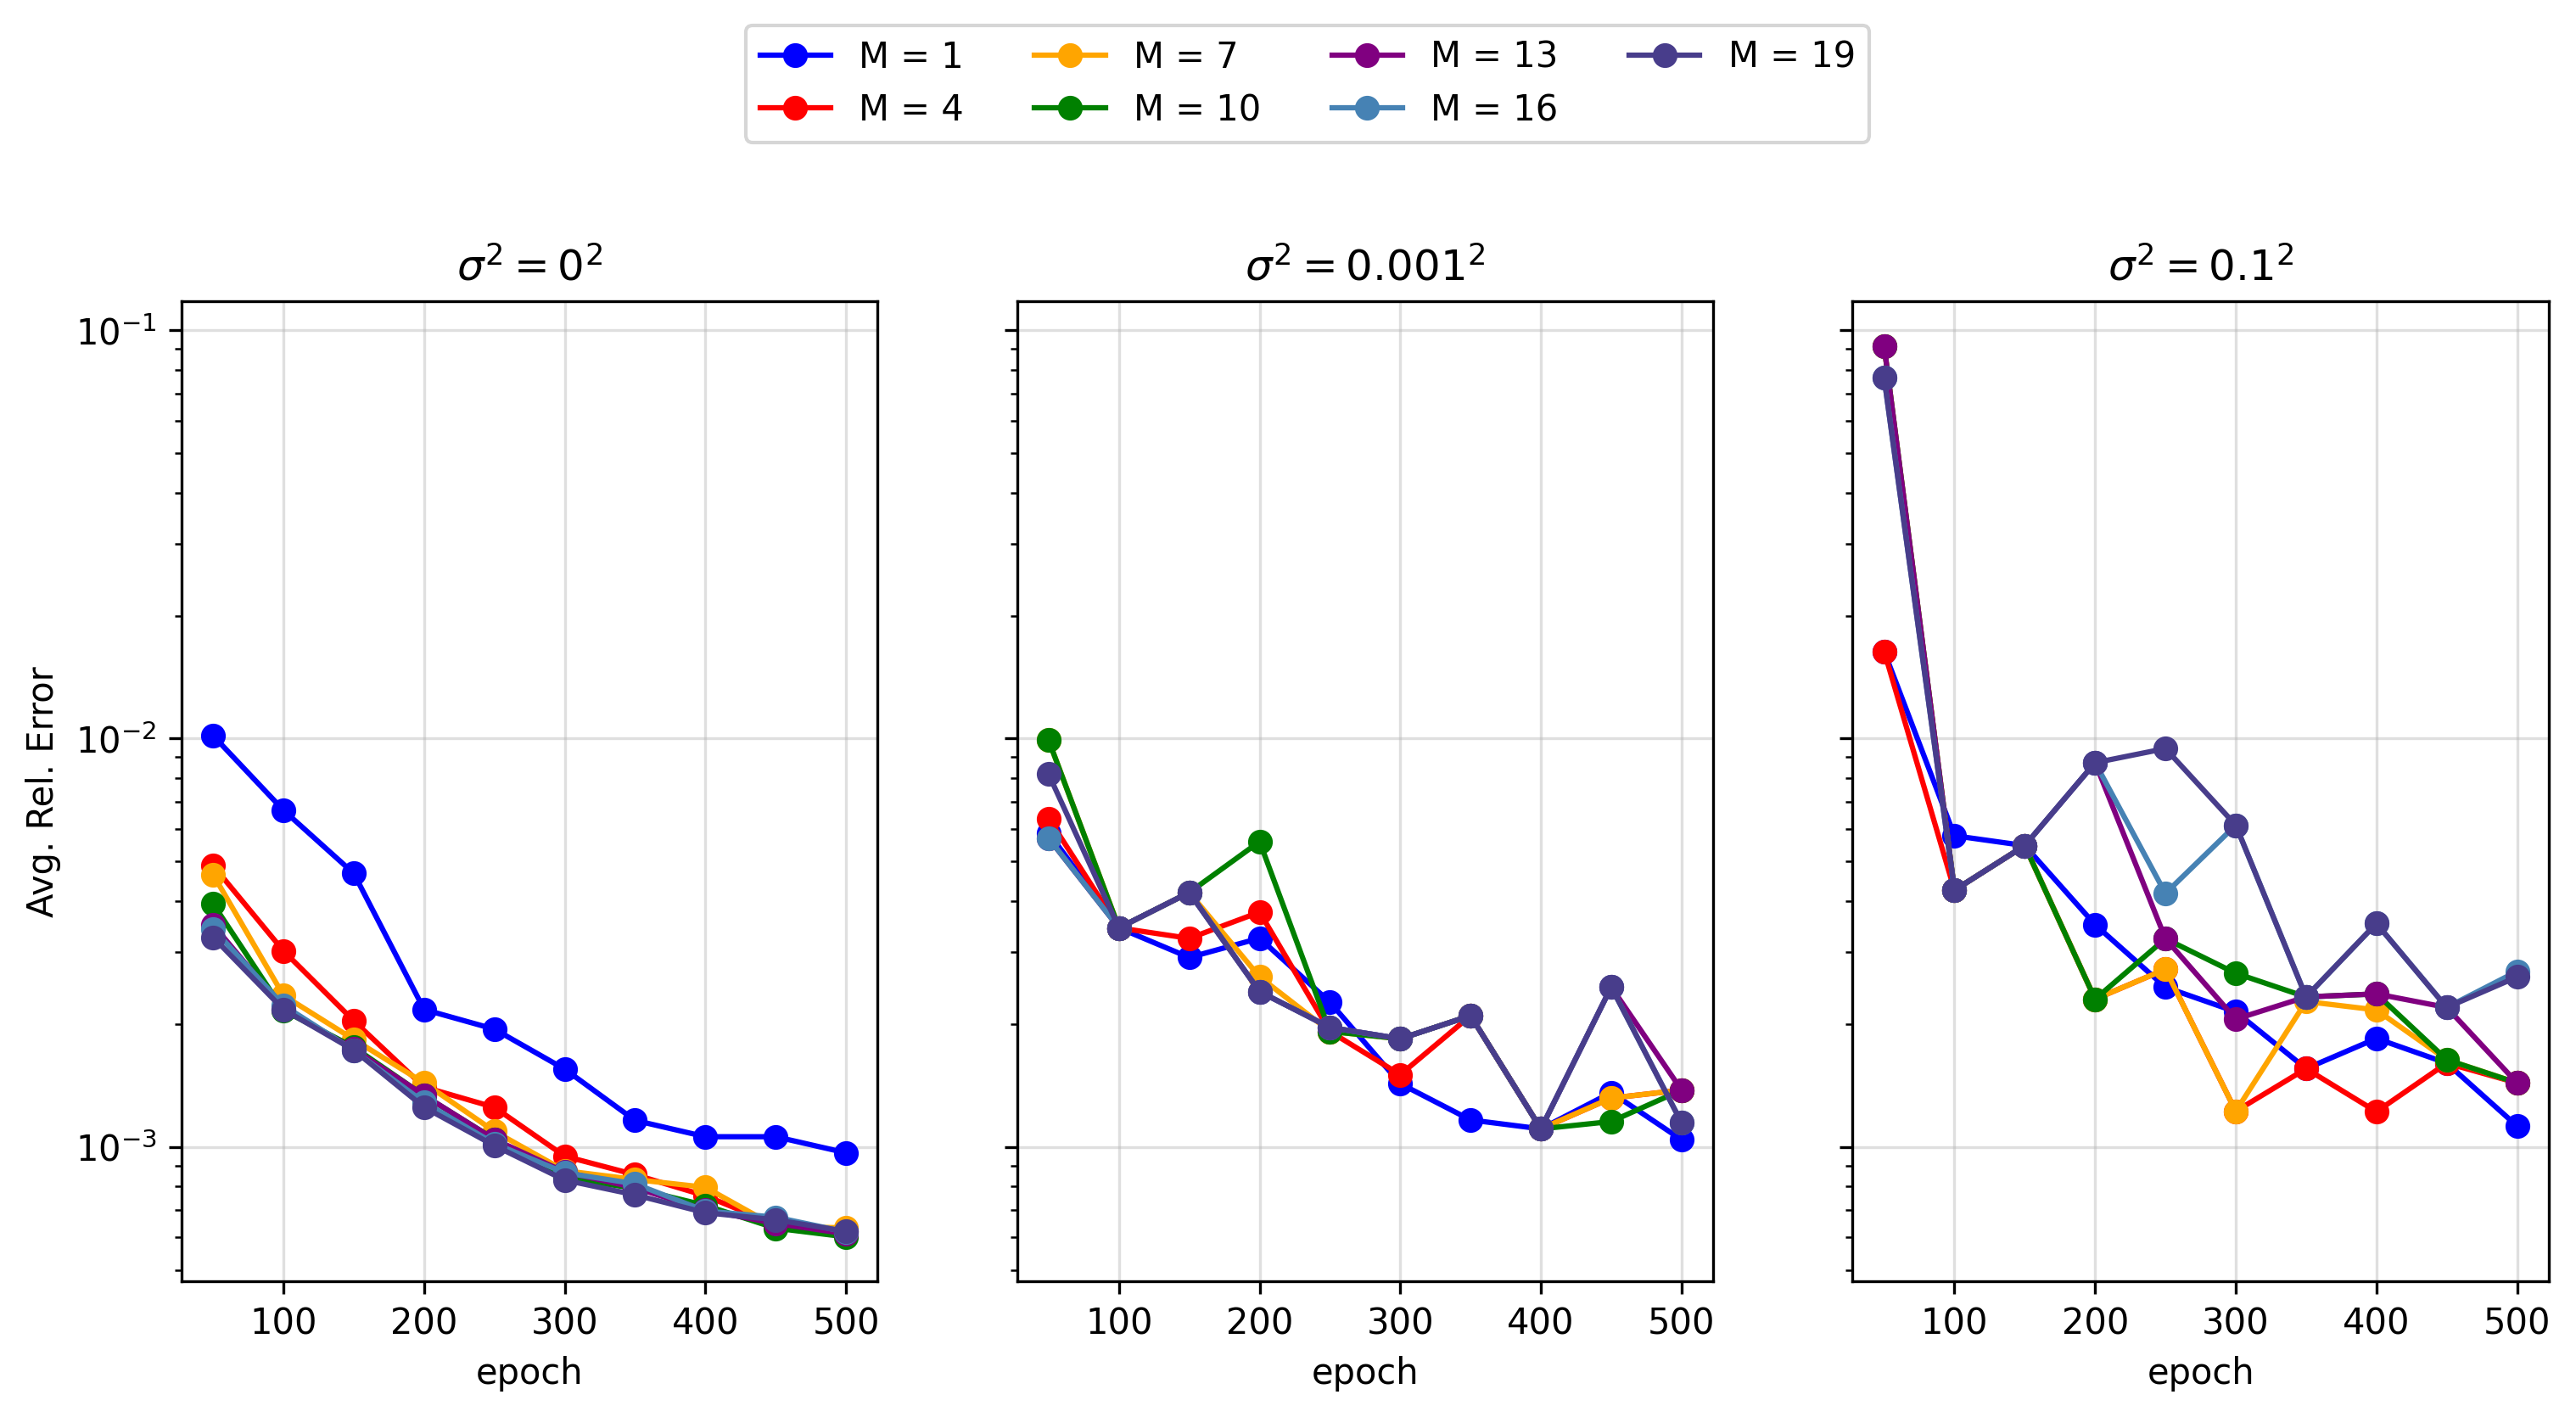

In [67]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize = (12, 5), dpi = 300)
colors = ["blue", "red", "orange", "green", "purple", "steelblue", "darkslateblue"]
sigmas = [0, 1e-3, 1e-1]
idx = 0

for i in list(range(0, 20, 3)):
    ax1.plot([50, 100, 150, 200, 250, 300, 350, 400, 450, 500], error_no_noises["IS"][i], marker = "o", label = f"M = {i+1}", color = colors[idx])
    ax2.plot([50, 100, 150, 200, 250, 300, 350, 400, 450, 500], error_noises1["IS"][i], marker = "o", label = f"M = {i+1}", color = colors[idx])
    ax3.plot([50, 100, 150, 200, 250, 300, 350, 400, 450, 500], error_noises2["IS"][i], marker = "o", label = f"M = {i+1}", color = colors[idx])
    idx+=1

for i ,ax in enumerate((ax1, ax2, ax3)) :
    ax.set_title(fr"$\sigma^2 = {sigmas[i]}^2$")
    ax.set_xlabel("epoch")
    ax.grid(True, alpha = 0.4)
    ax.set_yscale("log")

ax1.set_ylabel("Avg. Rel. Error")
ax2.legend(ncols = 4, bbox_to_anchor = (1.25, 1.3))
# plt.suptitle("Ensemble Method with addidive noise")
plt.savefig(SOURCE_PATH + "error_DP.pdf")
plt.show()

### 1.2 Uncertainty

In [ ]:
TEST_SAMPLE = 5

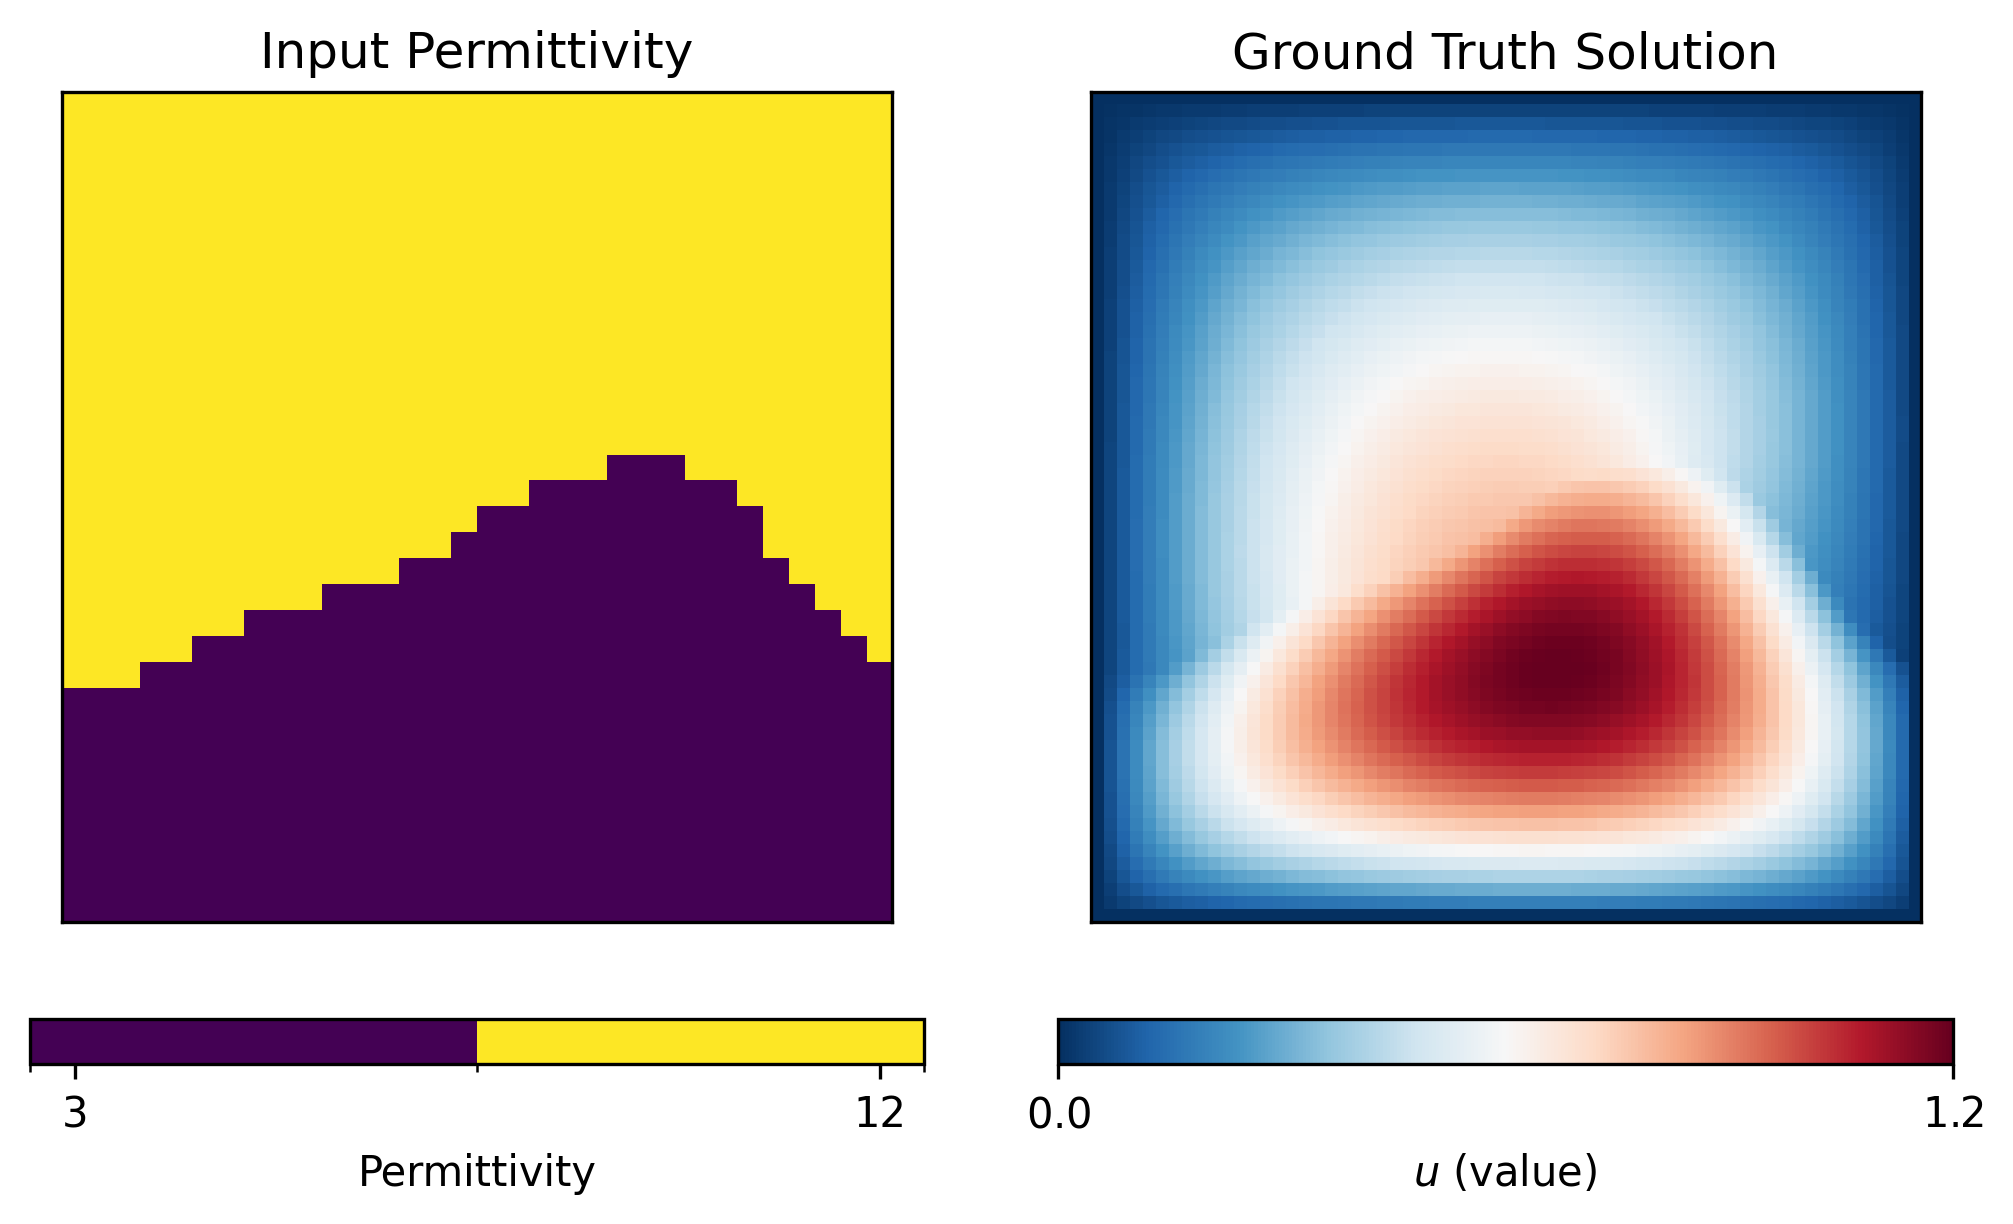

In [69]:
gt_nn = np.load(f"results/nn/gt.npz")
gt_n1 = np.load(f"results/n1/gt.npz")
gt_n2 =np.load(f"results/n2/gt.npz") 

# Example data
vmin_u = np.min(gt_n1["u"][TEST_SAMPLE])
vmax_u = np.max(gt_n1["u"][TEST_SAMPLE])

# Define segmented colormap for "a"
levels_a = [3, 12]  # Unique values in "a"
cmap_segmented = mcolors.ListedColormap(["#440154", "#FDE725"])  # Two distinct colors
norm_segmented = mcolors.BoundaryNorm([2.5, 7.5, 12.5], cmap_segmented.N, extend="neither")

fig, (ax1, ax2) = plt.subplots(1, 2, dpi=300, figsize=(7, 4))

# Subplot 1: "a" data with segmented colorbar
im1 = ax1.imshow(gt_n1["a"][TEST_SAMPLE], cmap=cmap_segmented, norm=norm_segmented)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title("Input Permittivity")

# Add segmented colorbar for "a"
cbar1 = fig.colorbar(
    im1,
    ax=ax1,
    orientation="horizontal",
    fraction=0.046,
    pad=0.1,
    ticks=levels_a  # Set discrete ticks
)
cbar1.set_ticklabels([f"{lvl}" for lvl in levels_a])  # Add custom tick labels
cbar1.set_label("Permittivity", fontsize=10)

# Subplot 2: "u" data with continuous colorbar
im2 = ax2.imshow(gt_n1["u"][TEST_SAMPLE], cmap="RdBu_r", vmin=vmin_u, vmax=vmax_u)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title("Ground Truth Solution")

# Add continuous colorbar for "u"
cbar2 = fig.colorbar(
    im2,
    ax=ax2,
    orientation="horizontal",
    fraction=0.046,
    pad=0.1
)
# Set more ticks for the continuous colorbar
num_ticks = 2
tick_positions = np.linspace(vmin_u, vmax_u, num_ticks)
cbar2.set_ticks(tick_positions)
cbar2.formatter = ticker.ScalarFormatter(useMathText=True)
cbar2.formatter.set_powerlimits((-2, 2))
cbar2.update_ticks()
cbar2.set_label(r"$u$ (value)", fontsize=10)

plt.tight_layout()
plt.show()

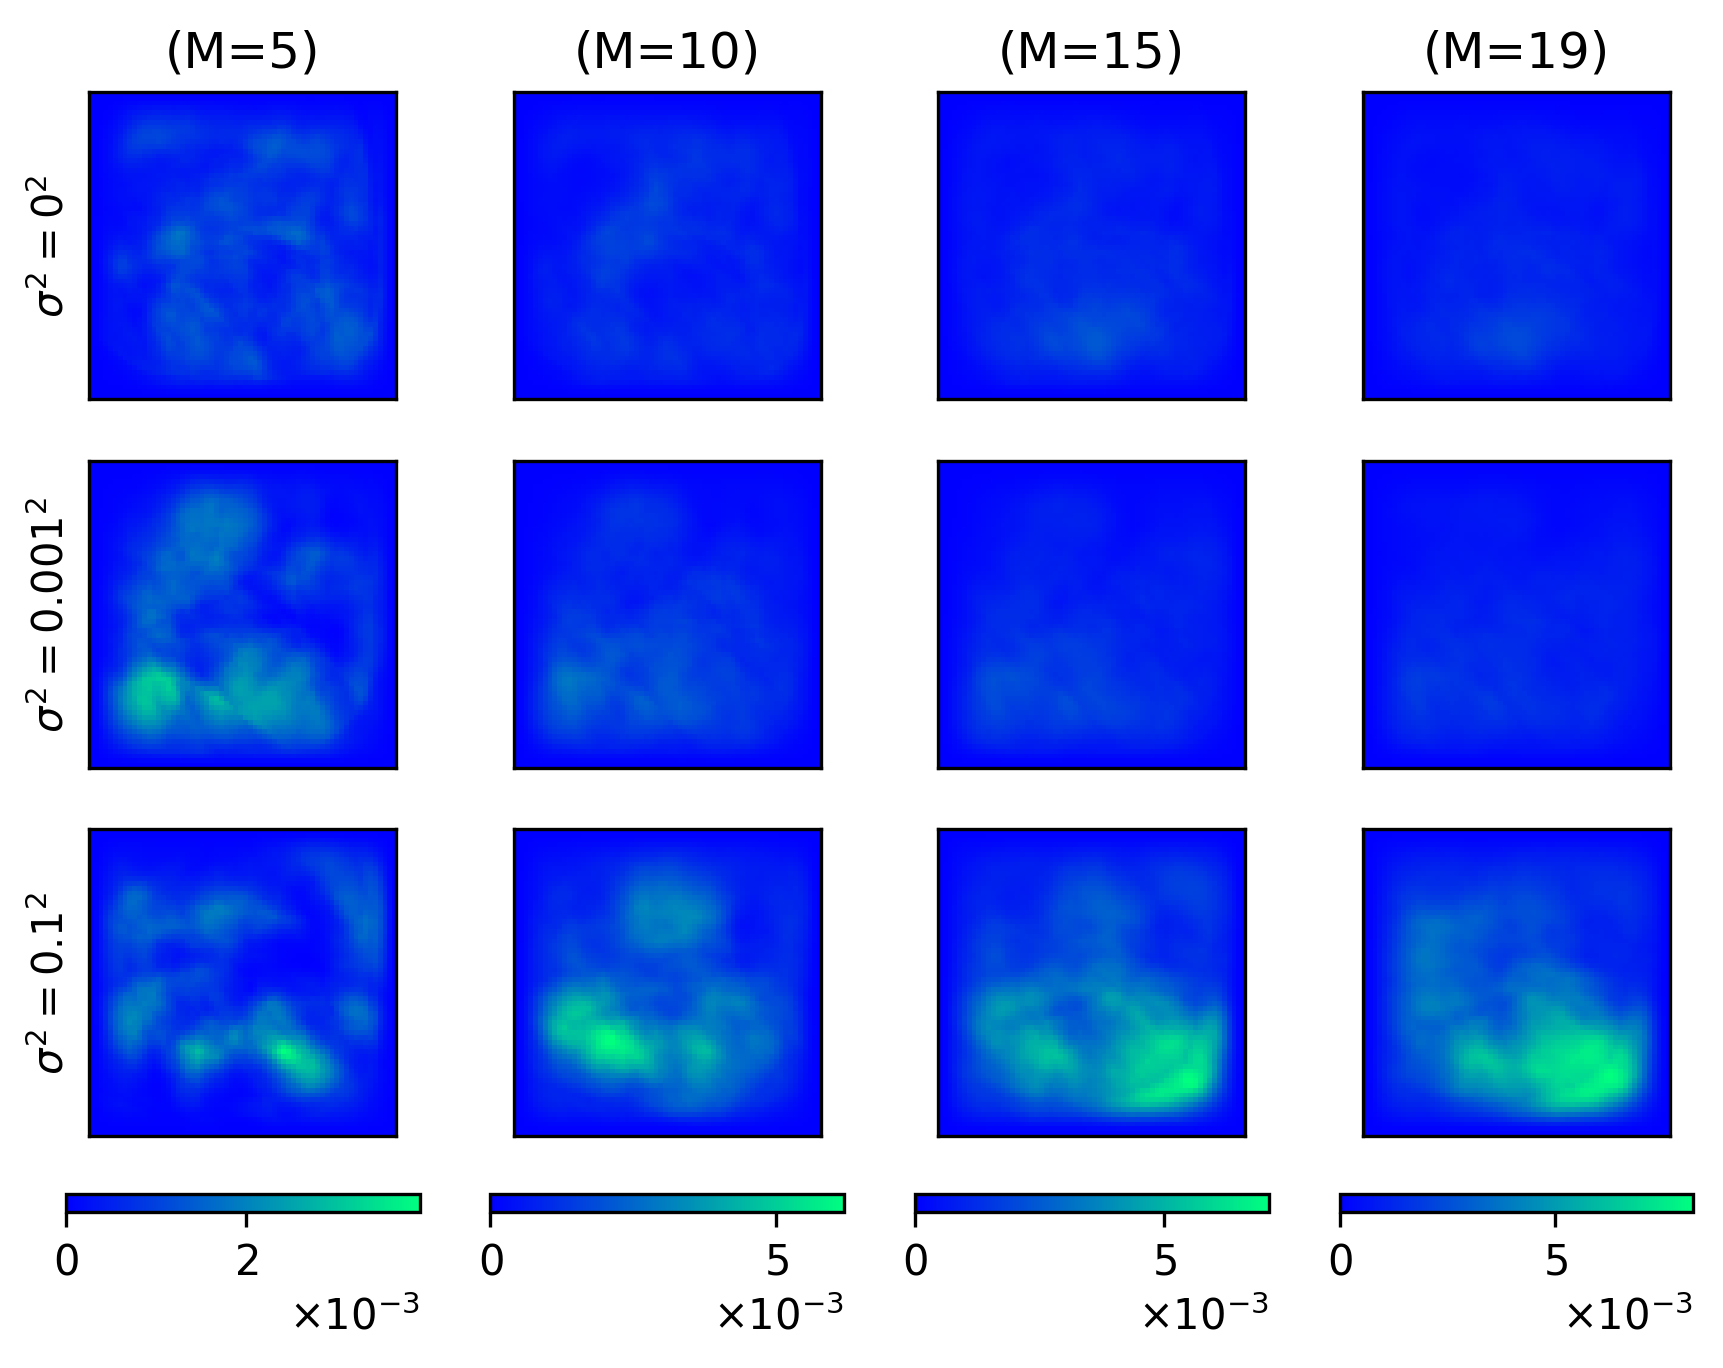

In [70]:
sigmas = [0, 1e-3, 1e-1]

fig, axs = plt.subplots(3, 4, figsize=(7, 5), dpi=300)
axs = axs.T  # Transpose for column-wise alignment

# Initialize vmin and vmax dictionaries for each column
vmin_dict = {}
vmax_dict = {}

# Compute vmin and vmax for each column
for ii, i in enumerate([5, 10, 15, 19]):
    res_no_noises = np.load(f"results/nn/{i}.npz")
    res_noises1 = np.load(f"results/n1/{i}.npz")
    res_noises2 = np.load(f"results/n2/{i}.npz")

    # Predictions
    std_pred_nn = res_no_noises["std_pred_DP"][TEST_SAMPLE][-1]
    std_pred_n1 = res_noises1["std_pred_DP"][TEST_SAMPLE][-1]
    std_pred_n2 = res_noises2["std_pred_DP"][TEST_SAMPLE][-1]

    # Find min and max values for the column
    vmin_dict[ii] = min(std_pred_nn.min(), std_pred_n1.min(), std_pred_n2.min())
    vmax_dict[ii] = max(std_pred_nn.max(), std_pred_n1.max(), std_pred_n2.max())

# Plot the data
for ii, i in enumerate([5, 10, 15, 19]):
    ax1, ax2, ax3 = axs[ii]

    res_no_noises = np.load(f"results/nn/{i}.npz")
    res_noises1 = np.load(f"results/n1/{i}.npz")
    res_noises2 = np.load(f"results/n2/{i}.npz")

    # Predictions
    std_pred_nn = res_no_noises["std_pred_DP"][TEST_SAMPLE][-1]
    std_pred_n1 = res_noises1["std_pred_DP"][TEST_SAMPLE][-1]
    std_pred_n2 = res_noises2["std_pred_DP"][TEST_SAMPLE][-1]

    std_nn = tf.reshape(std_pred_nn, (64, 64))
    std_n1 = tf.reshape(std_pred_n1, (64, 64))
    std_n2 = tf.reshape(std_pred_n2, (64, 64))

    # Use consistent vmin and vmax for the column
    vmin = vmin_dict[ii]
    vmax = vmax_dict[ii]

    # Plot the data
    im1 = ax1.imshow(std_nn, cmap="winter", vmin=vmin, vmax=vmax)
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.set_title(f"(M={i})")

    im2 = ax2.imshow(std_n1, cmap="winter", vmin=vmin, vmax=vmax)
    ax2.set_xticks([])
    ax2.set_yticks([])

    im3 = ax3.imshow(std_n2, cmap="winter", vmin=vmin, vmax=vmax)
    ax3.set_xticks([])
    ax3.set_yticks([])

    # Add row labels
    if ii == 0:
        ax1.set_ylabel(fr"$\sigma^2 = {sigmas[0]}^2$")
        ax2.set_ylabel(fr"$\sigma^2 = {sigmas[1]}^2$")
        ax3.set_ylabel(fr"$\sigma^2 = {sigmas[2]}^2$")

# Add colorbars below each column
for ii, ax_col in enumerate(axs):
    im = ax_col[0].get_images()[0]  # Access the first imshow object in the column
    cbar = fig.colorbar(
        im,
        ax=ax_col,
        orientation="horizontal",
        fraction=0.046,
        pad=0.05
    )
    cbar.formatter = ticker.ScalarFormatter(useMathText=True)
    cbar.formatter.set_powerlimits((-2, 2))
    cbar.update_ticks()
    # cbar.set_label(r"$\sigma$ (std)", fontsize=10)


# plt.tight_layout()
plt.savefig(SOURCE_PATH + f"u_std_{TEST_SAMPLE}_DP.pdf")
plt.show()

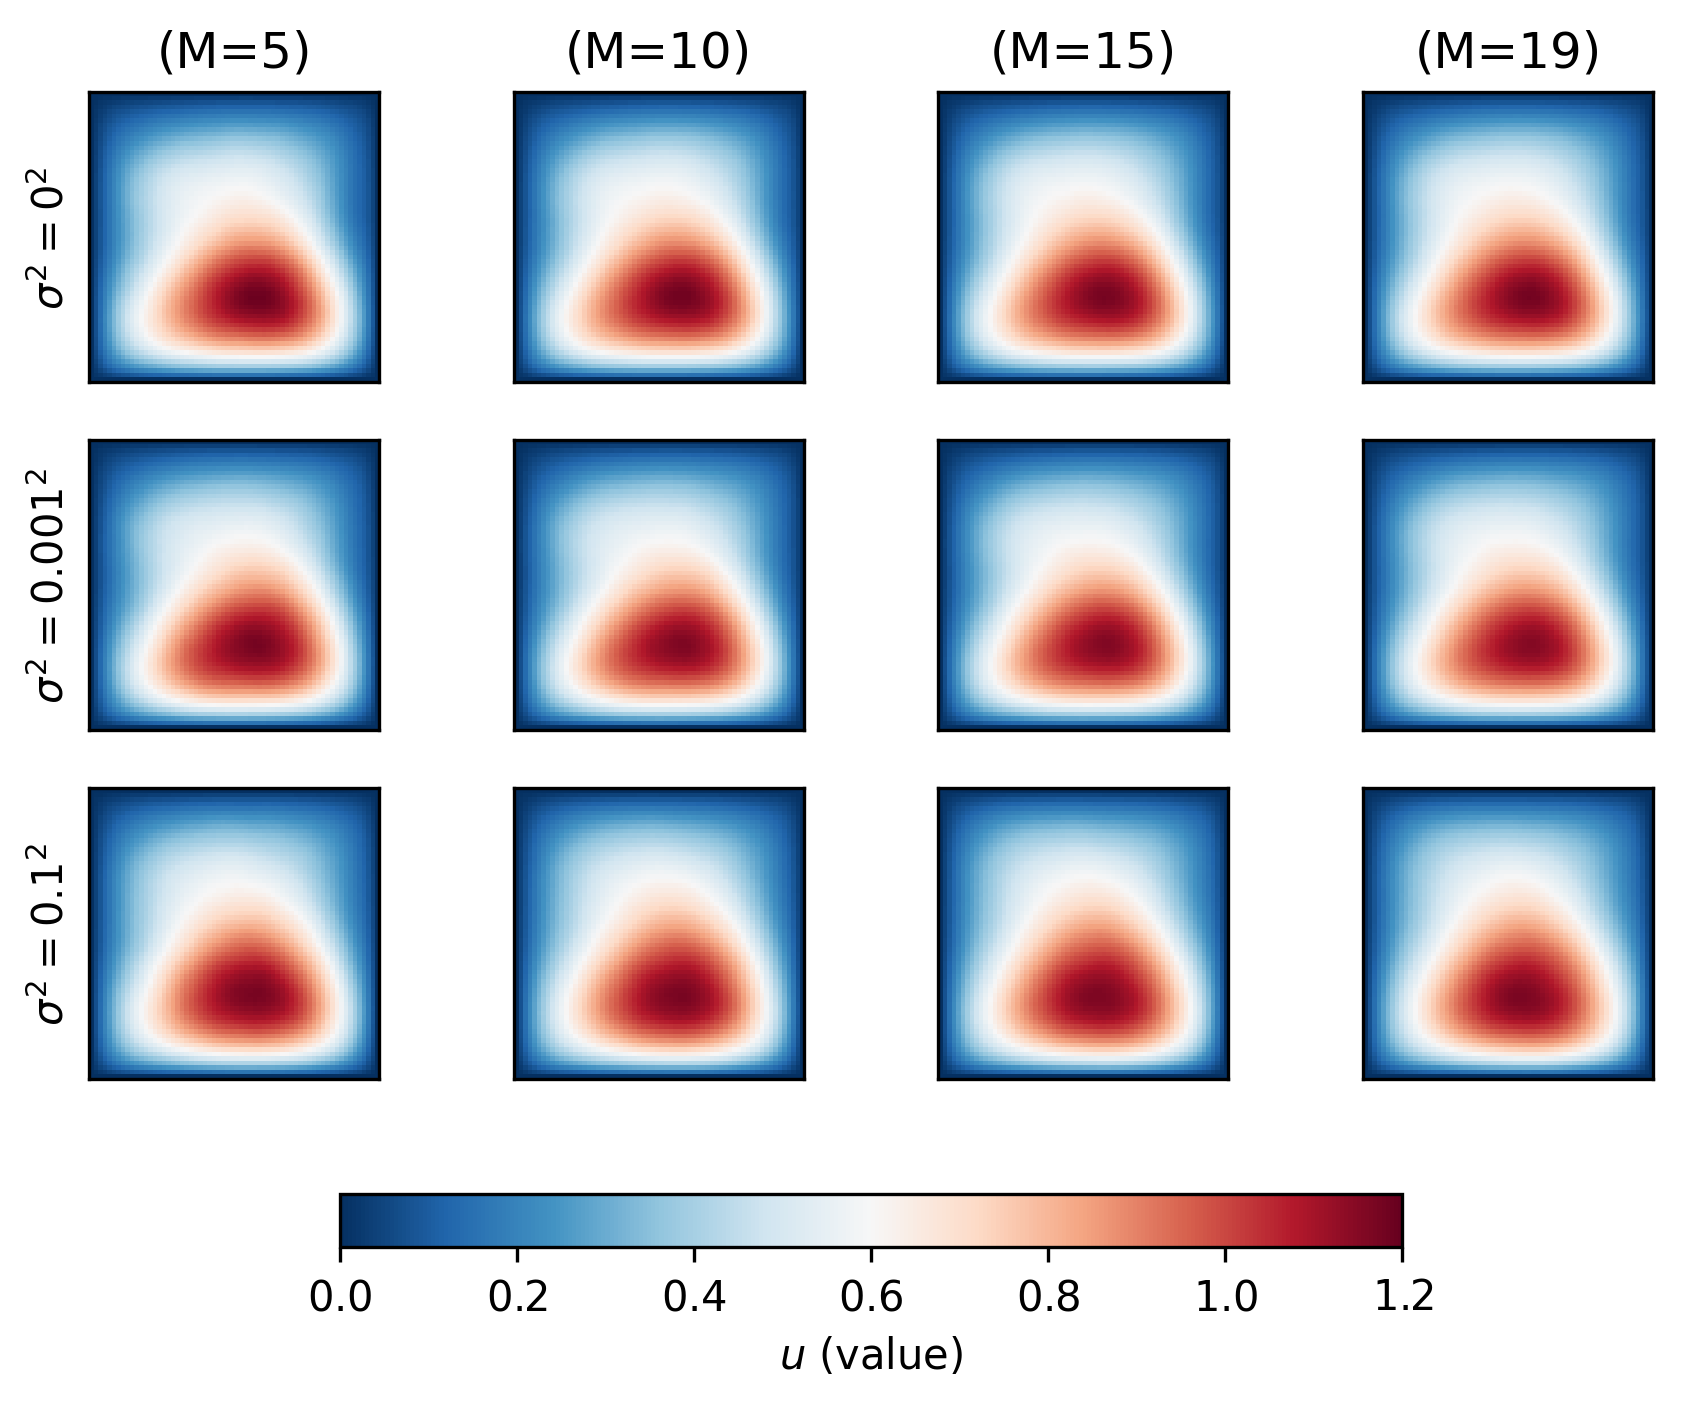

In [71]:
sigmas = [0, 1e-3, 1e-1]
fig, axs = plt.subplots(3, 4, figsize=(7, 5), dpi=300)
axs = axs.T  # Transpose for column-wise alignment

# Plot the predictions
for ii, i in enumerate([5, 10, 15, 19]):
    ax1, ax2, ax3 = axs[ii]

    res_no_noises = np.load(f"results/nn/{i}.npz")
    res_noises1 = np.load(f"results/n1/{i}.npz")
    res_noises2 = np.load(f"results/n2/{i}.npz")

    u_pred_nn = res_no_noises["u_pred_DP"][TEST_SAMPLE][-1]
    u_pred_n1 = res_noises1["u_pred_DP"][TEST_SAMPLE][-1]
    u_pred_n2 = res_noises2["u_pred_DP"][TEST_SAMPLE][-1]

    u_nn = tf.reshape(u_pred_nn, (64, 64))
    u_n1 = tf.reshape(u_pred_n1, (64, 64))
    u_n2 = tf.reshape(u_pred_n2, (64, 64))

    # Predictions
    im1 = ax1.imshow(u_nn, cmap="RdBu_r", vmin=vmin_u, vmax=vmax_u)
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.set_title(f"(M={i})")

    im2 = ax2.imshow(u_n1, cmap="RdBu_r", vmin=vmin_u, vmax=vmax_u)
    ax2.set_xticks([])
    ax2.set_yticks([])

    im3 = ax3.imshow(u_n2, cmap="RdBu_r", vmin=vmin_u, vmax=vmax_u)
    ax3.set_xticks([])
    ax3.set_yticks([])

    # Add row labels
    if ii == 0:
        ax1.set_ylabel(fr"$\sigma^2 = {sigmas[0]}^2$")
        ax2.set_ylabel(fr"$\sigma^2 = {sigmas[1]}^2$")
        ax3.set_ylabel(fr"$\sigma^2 = {sigmas[2]}^2$")

# Add a single shared colorbar below all subplots
cbar = fig.colorbar(
    im3,  # Use the last imshow object to create the colorbar
    ax=axs,
    orientation="horizontal",
    fraction=0.046,
    pad=0.1
)

# Define more ticks for the shared colorbar
num_ticks = 7  # Adjust as needed
tick_positions = np.linspace(vmin_u, vmax_u, num_ticks)
cbar.set_ticks(tick_positions)

# Format ticks for scientific notation
cbar.formatter = ticker.ScalarFormatter(useMathText=True)
cbar.formatter.set_powerlimits((-2, 2))
cbar.update_ticks()

# Add label for the colorbar
cbar.set_label(r"$u$ (value)", fontsize=10)


plt.savefig(SOURCE_PATH + f"u_pred_{TEST_SAMPLE}_IS.pdf")
plt.show()

># 2. Importance Sampling

### 2.1 Testing Error

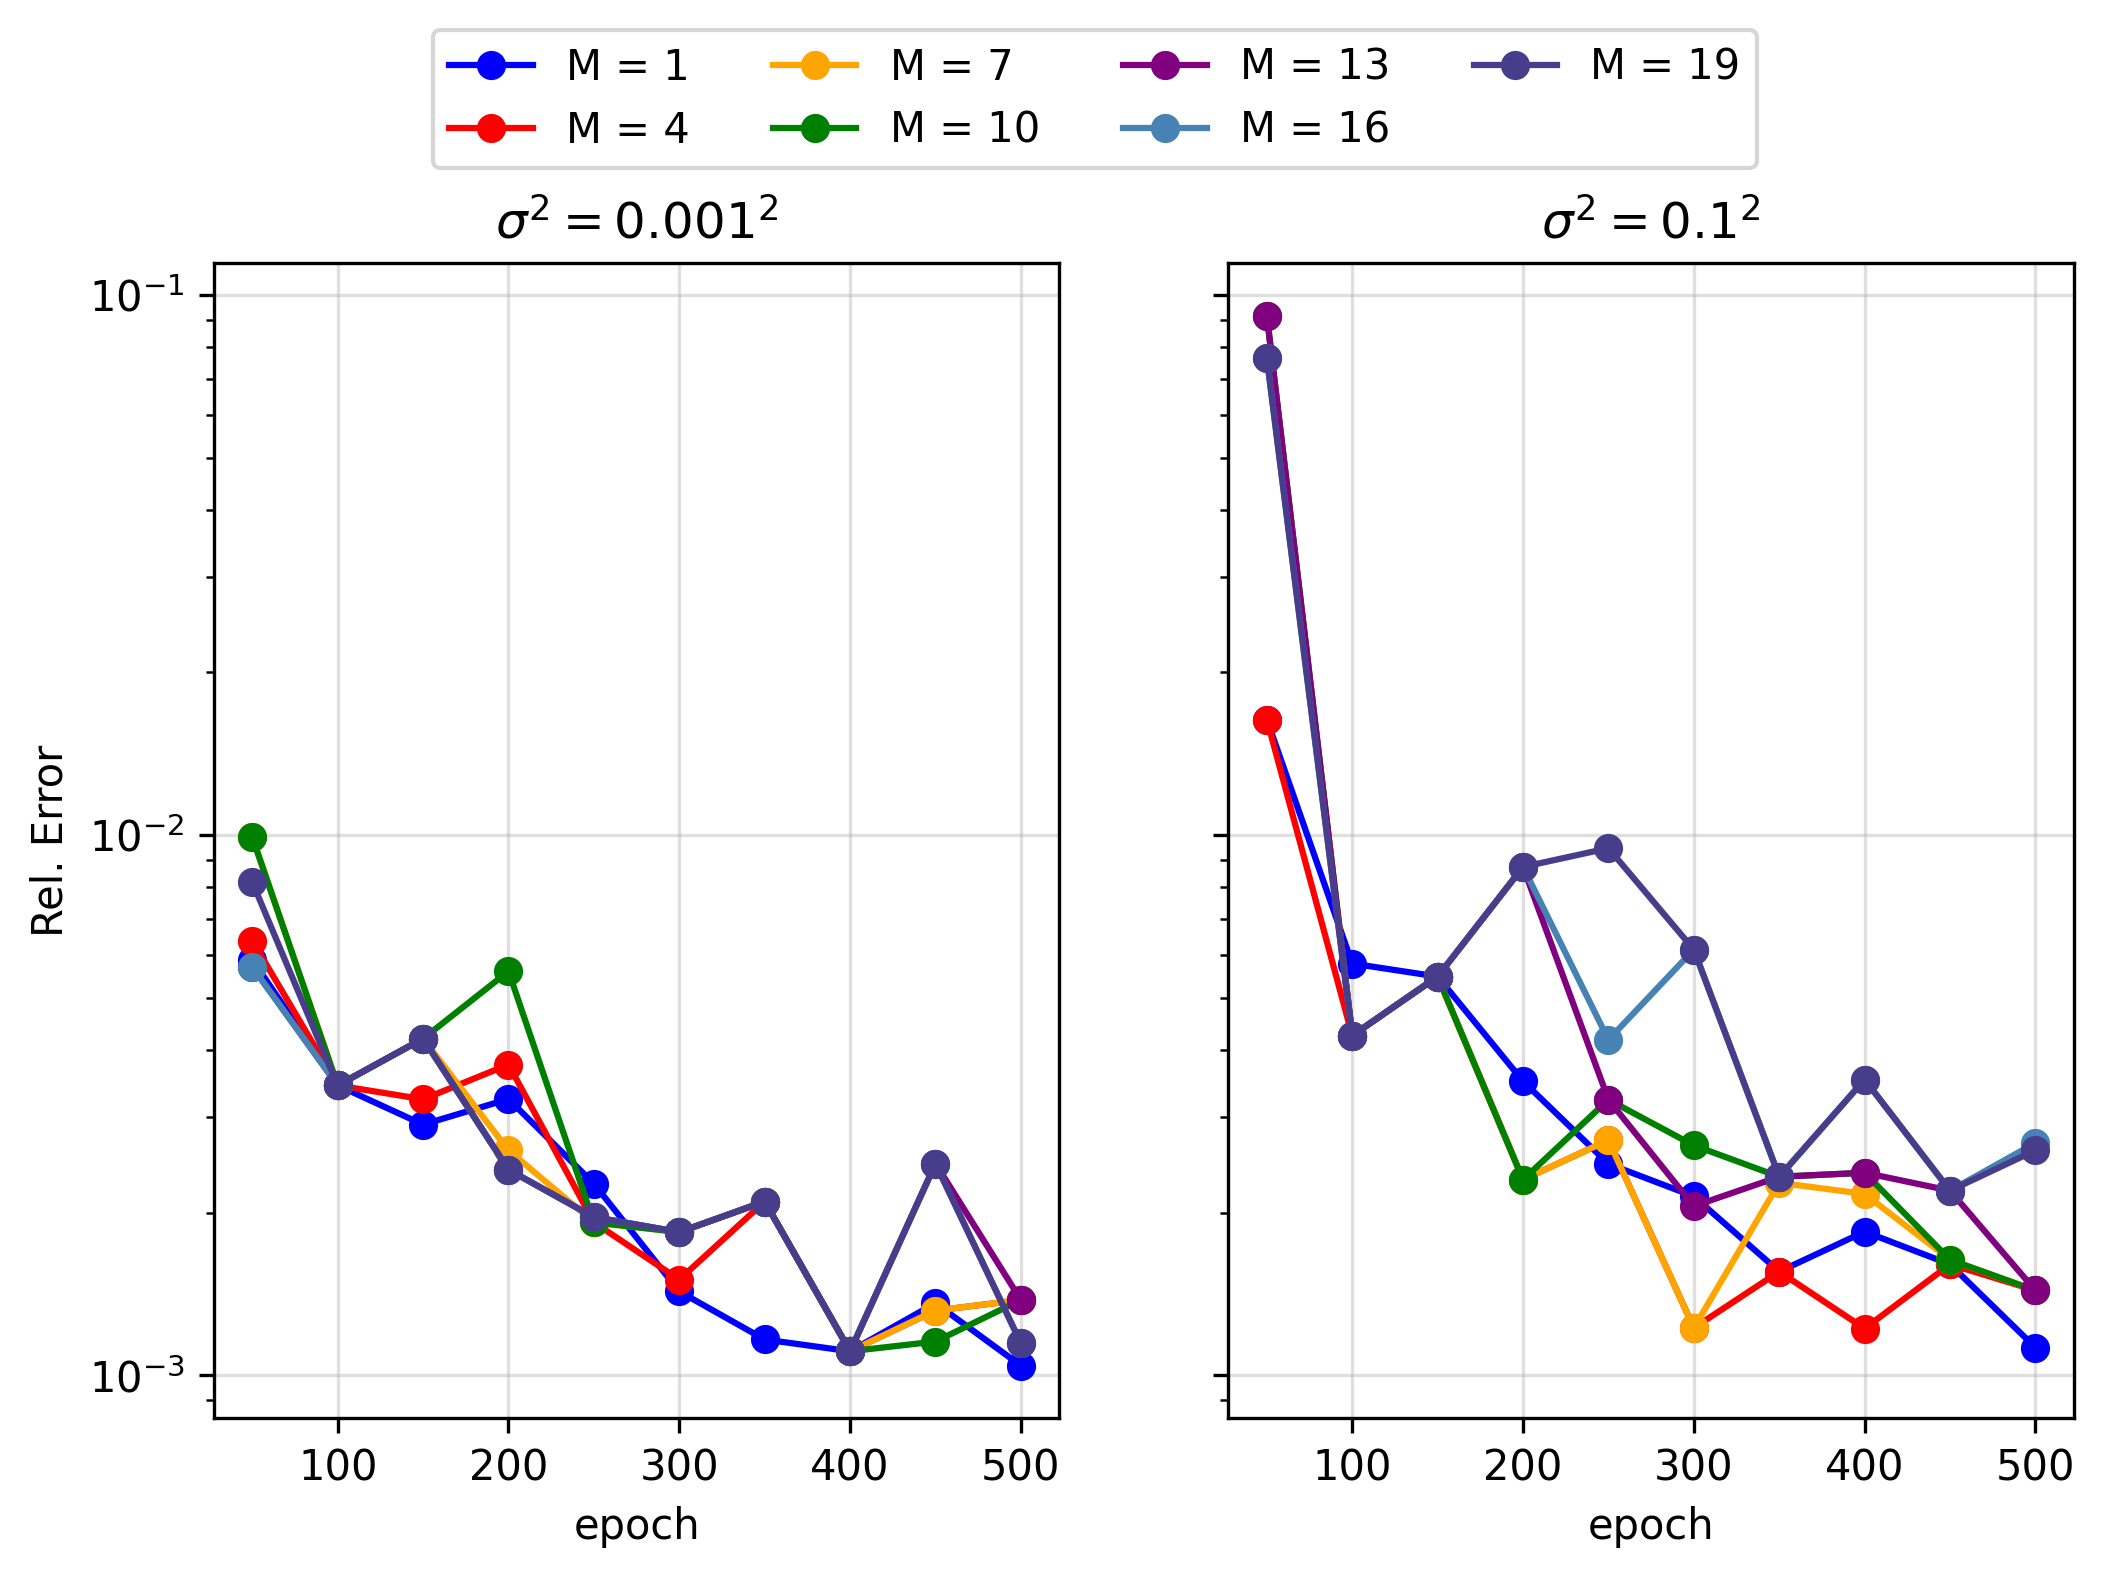

In [72]:
fig, (ax2, ax3) = plt.subplots(1, 2, sharey=True, figsize = (8, 5), dpi = 300)
colors = ["blue", "red", "orange", "green", "purple", "steelblue", "darkslateblue"]
sigmas = [1e-3, 1e-1]
idx = 0

for i in list(range(0, 20, 3)):
    ax2.plot([50, 100, 150, 200, 250, 300, 350, 400, 450, 500], error_noises1["IS"][i], marker = "o", label = f"M = {i+1}", color = colors[idx])
    ax3.plot([50, 100, 150, 200, 250, 300, 350, 400, 450, 500], error_noises2["IS"][i], marker = "o", label = f"M = {i+1}", color = colors[idx])
    idx+=1

for i ,ax in enumerate((ax2, ax3)) :
    ax.set_title(fr"$\sigma^2 = {sigmas[i]}^2$")
    ax.set_xlabel("epoch")
    ax.grid(True, alpha = 0.4)
    ax.set_yscale("log")

ax2.set_ylabel("Rel. Error")
ax2.legend(ncols = 4, bbox_to_anchor = (1.85, 1.22))
plt.savefig(SOURCE_PATH + "error_IS.pdf")
plt.show()

### 2.2 Importance Weights across Epoch

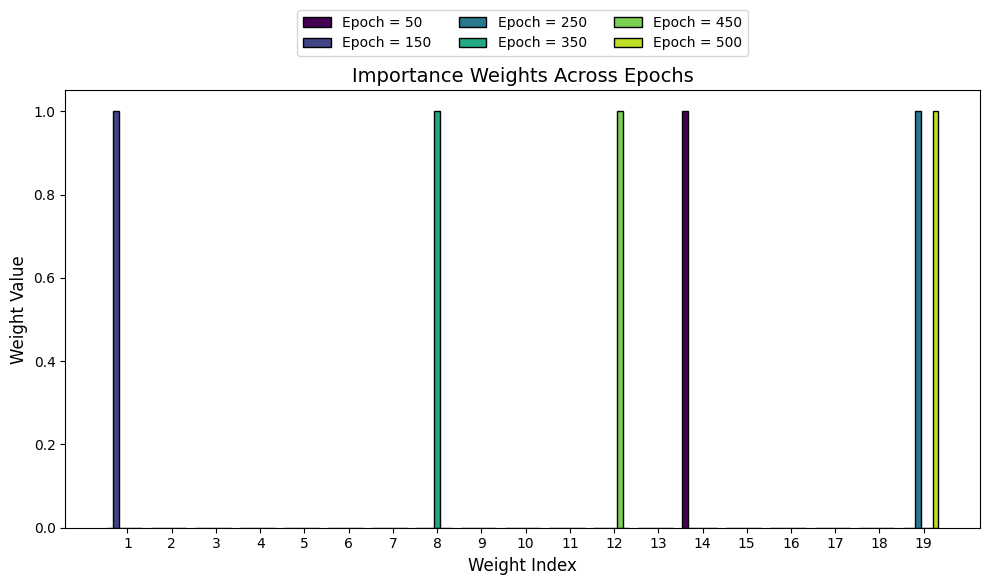

In [73]:
IS_weights = np.load(f"results/n2/19.npz")["IS_weights"]
epochs = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

fig = plt.figure(figsize=(10, 6))
cmap = plt.colormaps.get_cmap("viridis")  # Updated for Matplotlib 3.7+

bar_width = 0.8 / (len(range(0, IS_weights.shape[0], 2)) + 1)  # Adjust width dynamically

# Plotting the bars with slight offsets
for i, t in enumerate(list(range(0, IS_weights.shape[0], 2)) + [9]):
    color = cmap(t / IS_weights.shape[0])  # Get a distinct color for each iteration
    x_positions = np.arange(1, IS_weights.shape[1] + 1, 1) - 0.4 + i * bar_width
    plt.bar(
        x_positions,
        IS_weights[t],
        width=bar_width,
        color=color,
        label=f"Epoch = {epochs[t]}",
        edgecolor="k"
    )


# Customizing the plot
plt.xticks(np.arange(1, IS_weights.shape[1] + 1, 1))
plt.xlabel("Weight Index", fontsize=12)
plt.ylabel("Weight Value", fontsize=12)
plt.title("Importance Weights Across Epochs", fontsize=14)
plt.legend(ncols=3, bbox_to_anchor=(0.5, 1.2), loc="upper center", fontsize=10)
plt.tight_layout()
plt.savefig(SOURCE_PATH + "IS_weights.pdf")
plt.show()





### 2.3 Uncertainty

In [ ]:
TEST_SAMPLE = 5

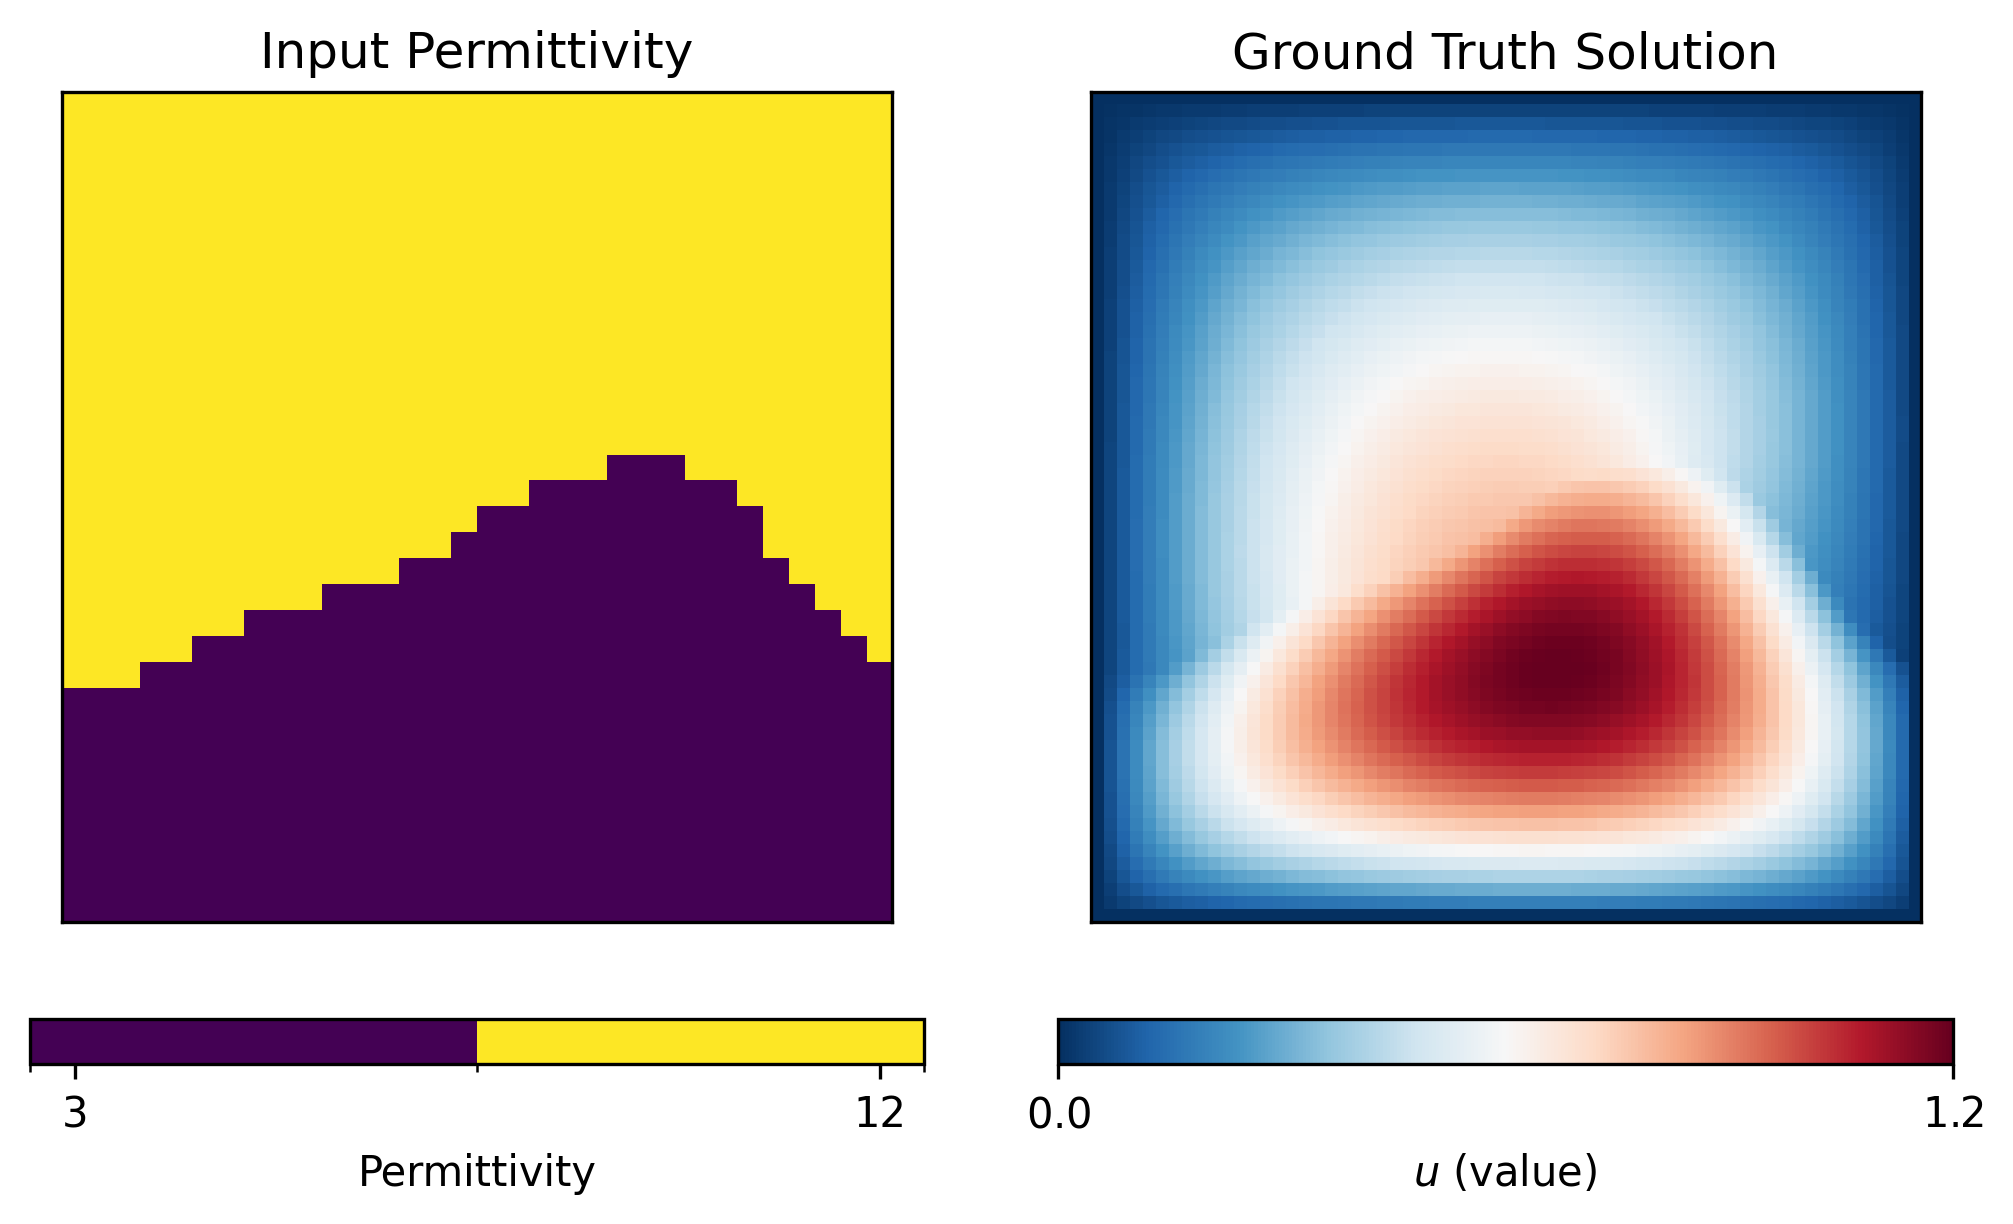

In [75]:
gt_nn = np.load(f"results/nn/gt.npz")
gt_n1 = np.load(f"results/n1/gt.npz")
gt_n2 =np.load(f"results/n2/gt.npz") 

# Example data
vmin_u = np.min(gt_n1["u"][TEST_SAMPLE])
vmax_u = np.max(gt_n1["u"][TEST_SAMPLE])

# Define segmented colormap for "a"
levels_a = [3, 12]  # Unique values in "a"
cmap_segmented = mcolors.ListedColormap(["#440154", "#FDE725"])  # Two distinct colors
norm_segmented = mcolors.BoundaryNorm([2.5, 7.5, 12.5], cmap_segmented.N, extend="neither")

fig, (ax1, ax2) = plt.subplots(1, 2, dpi=300, figsize=(7, 4))

# Subplot 1: "a" data with segmented colorbar
im1 = ax1.imshow(gt_n1["a"][TEST_SAMPLE], cmap=cmap_segmented, norm=norm_segmented)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title("Input Permittivity")

# Add segmented colorbar for "a"
cbar1 = fig.colorbar(
    im1,
    ax=ax1,
    orientation="horizontal",
    fraction=0.046,
    pad=0.1,
    ticks=levels_a  # Set discrete ticks
)
cbar1.set_ticklabels([f"{lvl}" for lvl in levels_a])  # Add custom tick labels
cbar1.set_label("Permittivity", fontsize=10)

# Subplot 2: "u" data with continuous colorbar
im2 = ax2.imshow(gt_n1["u"][TEST_SAMPLE], cmap="RdBu_r", vmin=vmin_u, vmax=vmax_u)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title("Ground Truth Solution")

# Add continuous colorbar for "u"
cbar2 = fig.colorbar(
    im2,
    ax=ax2,
    orientation="horizontal",
    fraction=0.046,
    pad=0.1
)
# Set more ticks for the continuous colorbar
num_ticks = 2
tick_positions = np.linspace(vmin_u, vmax_u, num_ticks)
cbar2.set_ticks(tick_positions)
cbar2.formatter = ticker.ScalarFormatter(useMathText=True)
cbar2.formatter.set_powerlimits((-2, 2))
cbar2.update_ticks()
cbar2.set_label(r"$u$ (value)", fontsize=10)

plt.tight_layout()
plt.show()

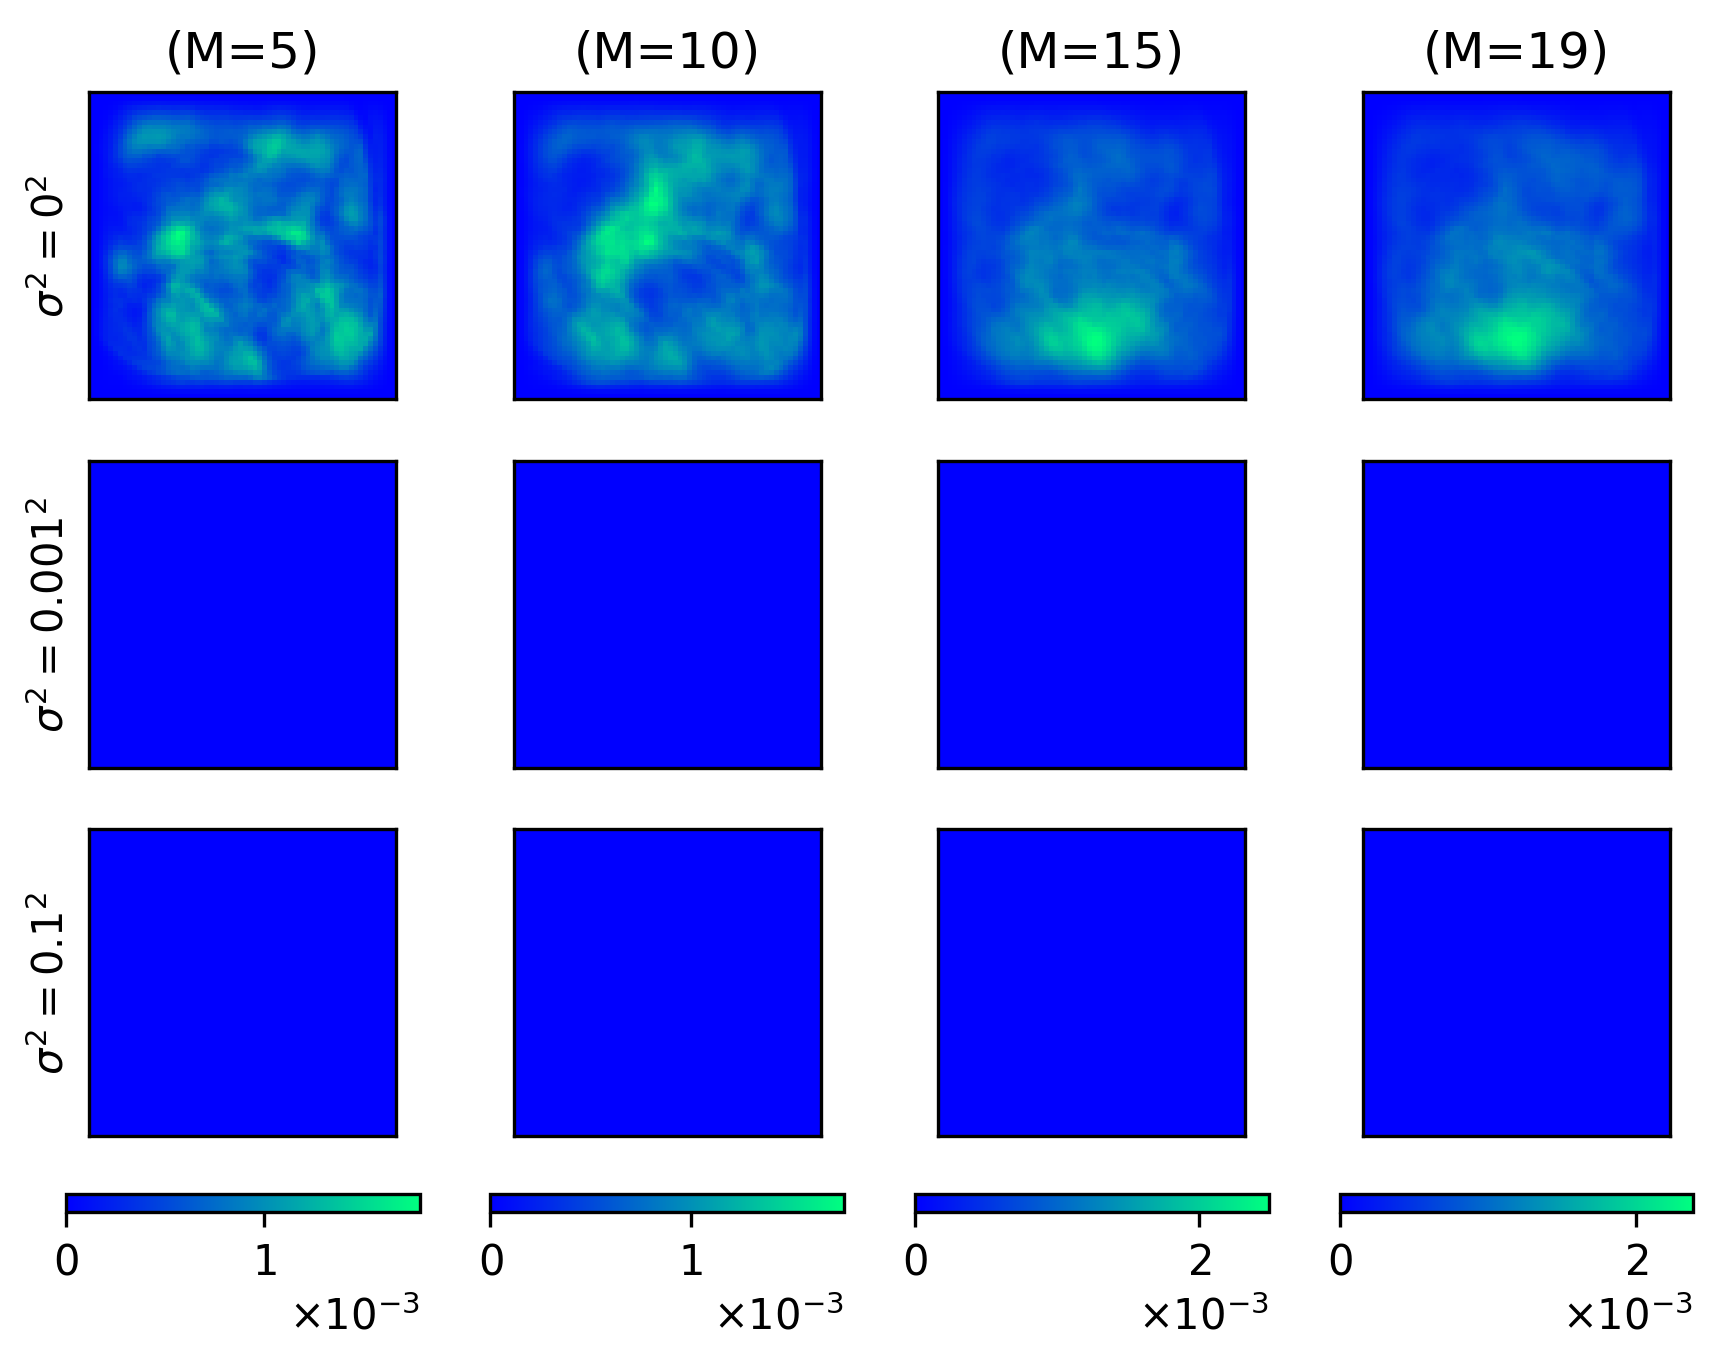

In [76]:
sigmas = [0, 1e-3, 1e-1]

fig, axs = plt.subplots(3, 4, figsize=(7, 5), dpi=300)
axs = axs.T  # Transpose for column-wise alignment

# Initialize vmin and vmax dictionaries for each column
vmin_dict = {}
vmax_dict = {}

# Compute vmin and vmax for each column
for ii, i in enumerate([5, 10, 15, 19]):
    res_no_noises = np.load(f"results/nn/{i}.npz")
    res_noises1 = np.load(f"results/n1/{i}.npz")
    res_noises2 = np.load(f"results/n2/{i}.npz")

    # Predictions
    std_pred_nn = res_no_noises["std_pred_IS"][TEST_SAMPLE][-1]
    std_pred_n1 = res_noises1["std_pred_IS"][TEST_SAMPLE][-1]
    std_pred_n2 = res_noises2["std_pred_IS"][TEST_SAMPLE][-1]

    # Find min and max values for the column
    vmin_dict[ii] = min(std_pred_nn.min(), std_pred_n1.min(), std_pred_n2.min())
    vmax_dict[ii] = max(std_pred_nn.max(), std_pred_n1.max(), std_pred_n2.max())

# Plot the data
for ii, i in enumerate([5, 10, 15, 19]):
    ax1, ax2, ax3 = axs[ii]

    res_no_noises = np.load(f"results/nn/{i}.npz")
    res_noises1 = np.load(f"results/n1/{i}.npz")
    res_noises2 = np.load(f"results/n2/{i}.npz")

    # Predictions
    std_pred_nn = res_no_noises["std_pred_IS"][TEST_SAMPLE][-1]
    std_pred_n1 = res_noises1["std_pred_IS"][TEST_SAMPLE][-1]
    std_pred_n2 = res_noises2["std_pred_IS"][TEST_SAMPLE][-1]

    std_nn = tf.reshape(std_pred_nn, (64, 64))
    std_n1 = tf.reshape(std_pred_n1, (64, 64))
    std_n2 = tf.reshape(std_pred_n2, (64, 64))

    # Use consistent vmin and vmax for the column
    vmin = vmin_dict[ii]
    vmax = vmax_dict[ii]

    # Plot the data
    im1 = ax1.imshow(std_nn, cmap="winter", vmin=vmin, vmax=vmax)
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.set_title(f"(M={i})")

    im2 = ax2.imshow(std_n1, cmap="winter", vmin=vmin, vmax=vmax)
    ax2.set_xticks([])
    ax2.set_yticks([])

    im3 = ax3.imshow(std_n2, cmap="winter", vmin=vmin, vmax=vmax)
    ax3.set_xticks([])
    ax3.set_yticks([])

    # Add row labels
    if ii == 0:
        ax1.set_ylabel(fr"$\sigma^2 = {sigmas[0]}^2$")
        ax2.set_ylabel(fr"$\sigma^2 = {sigmas[1]}^2$")
        ax3.set_ylabel(fr"$\sigma^2 = {sigmas[2]}^2$")

# Add colorbars below each column
for ii, ax_col in enumerate(axs):
    im = ax_col[0].get_images()[0]  # Access the first imshow object in the column
    cbar = fig.colorbar(
        im,
        ax=ax_col,
        orientation="horizontal",
        fraction=0.046,
        pad=0.05
    )
    cbar.formatter = ticker.ScalarFormatter(useMathText=True)
    cbar.formatter.set_powerlimits((-2, 2))
    cbar.update_ticks()
    # cbar.set_label(r"$\sigma$ (std)", fontsize=10)

# plt.tight_layout()
plt.savefig(SOURCE_PATH + f"u_std_{TEST_SAMPLE}_IS.pdf")
plt.show()




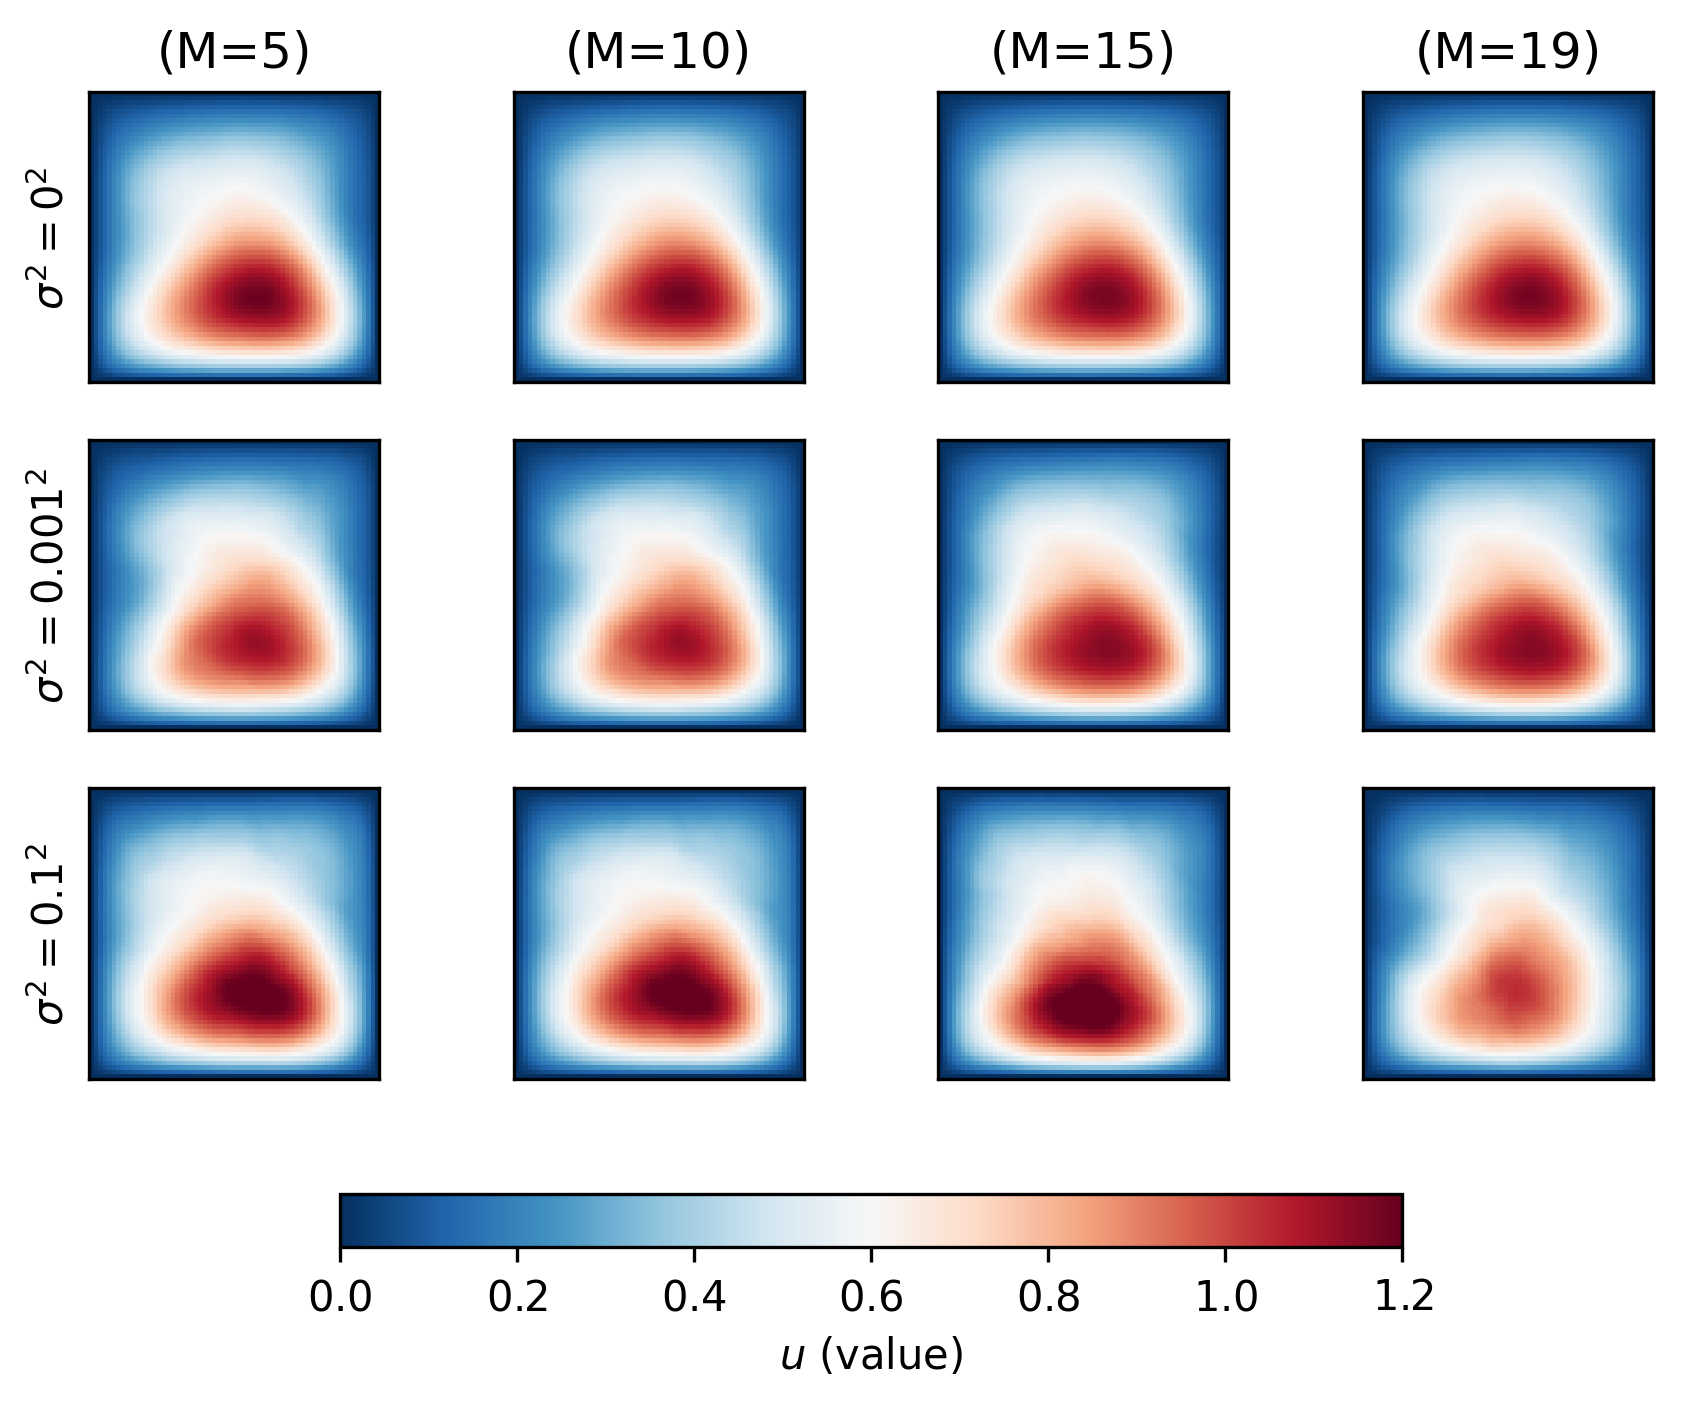

In [77]:
sigmas = [0, 1e-3, 1e-1]
fig, axs = plt.subplots(3, 4, figsize=(7, 5), dpi=300)
axs = axs.T  # Transpose for column-wise alignment

# Plot the predictions
for ii, i in enumerate([5, 10, 15, 19]):
    ax1, ax2, ax3 = axs[ii]

    res_no_noises = np.load(f"results/nn/{i}.npz")
    res_noises1 = np.load(f"results/n1/{i}.npz")
    res_noises2 = np.load(f"results/n2/{i}.npz")

    u_pred_nn = res_no_noises["u_pred_IS"][TEST_SAMPLE][-1]
    u_pred_n1 = res_noises1["u_pred_IS"][TEST_SAMPLE][-1]
    u_pred_n2 = res_noises2["u_pred_IS"][TEST_SAMPLE][-1]

    u_nn = tf.reshape(u_pred_nn, (64, 64))
    u_n1 = tf.reshape(u_pred_n1, (64, 64))
    u_n2 = tf.reshape(u_pred_n2, (64, 64))

    # Predictions
    im1 = ax1.imshow(u_nn, cmap="RdBu_r", vmin=vmin_u, vmax=vmax_u)
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.set_title(f"(M={i})")

    im2 = ax2.imshow(u_n1, cmap="RdBu_r", vmin=vmin_u, vmax=vmax_u)
    ax2.set_xticks([])
    ax2.set_yticks([])

    im3 = ax3.imshow(u_n2, cmap="RdBu_r", vmin=vmin_u, vmax=vmax_u)
    ax3.set_xticks([])
    ax3.set_yticks([])

    # Add row labels
    if ii == 0:
        ax1.set_ylabel(fr"$\sigma^2 = {sigmas[0]}^2$")
        ax2.set_ylabel(fr"$\sigma^2 = {sigmas[1]}^2$")
        ax3.set_ylabel(fr"$\sigma^2 = {sigmas[2]}^2$")

# Add a single shared colorbar below all subplots
cbar = fig.colorbar(
    im3,  # Use the last imshow object to create the colorbar
    ax=axs,
    orientation="horizontal",
    fraction=0.046,
    pad=0.1
)

# Define more ticks for the shared colorbar
num_ticks = 7  # Adjust as needed
tick_positions = np.linspace(vmin_u, vmax_u, num_ticks)
cbar.set_ticks(tick_positions)

# Format ticks for scientific notation
cbar.formatter = ticker.ScalarFormatter(useMathText=True)
cbar.formatter.set_powerlimits((-2, 2))
cbar.update_ticks()

# Add label for the colorbar
cbar.set_label(r"$u$ (value)", fontsize=10)


plt.savefig(SOURCE_PATH + f"u_pred_{TEST_SAMPLE}_IS.pdf")
plt.show()

# Examples

In [78]:
N_MODELS = 19
NOISE_LEVEL = "nn"

In [79]:
gt = np.load(f"results/{NOISE_LEVEL}/gt.npz")
res = np.load(f"results/{NOISE_LEVEL}/{N_MODELS}.npz")

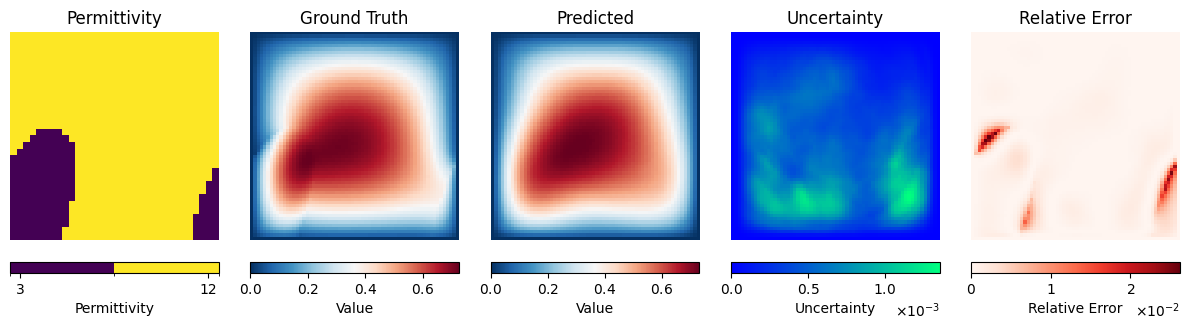

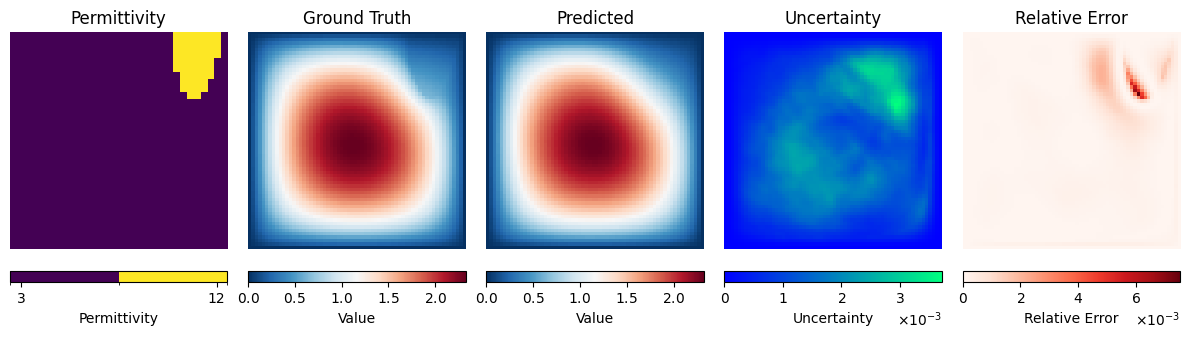

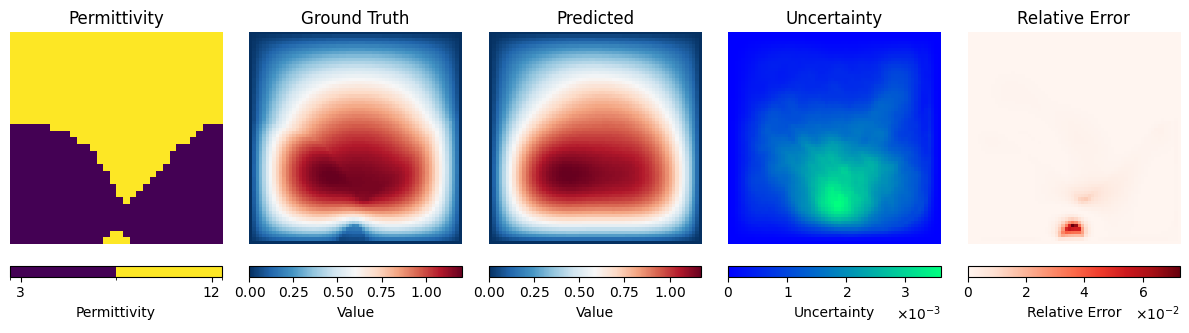

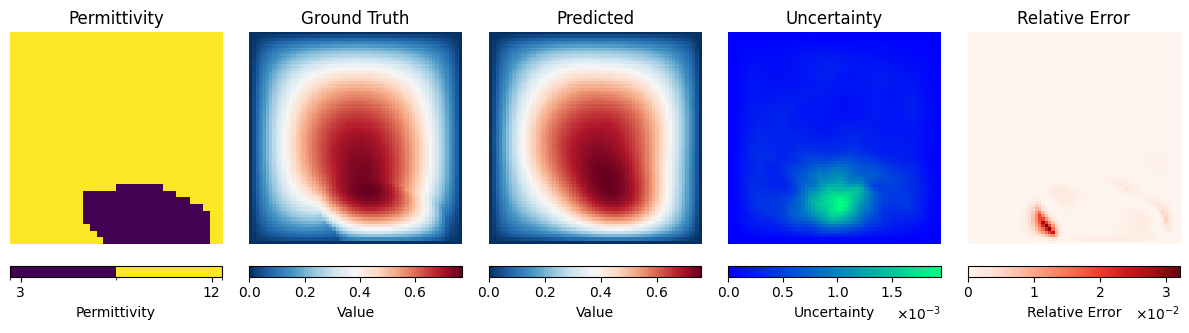

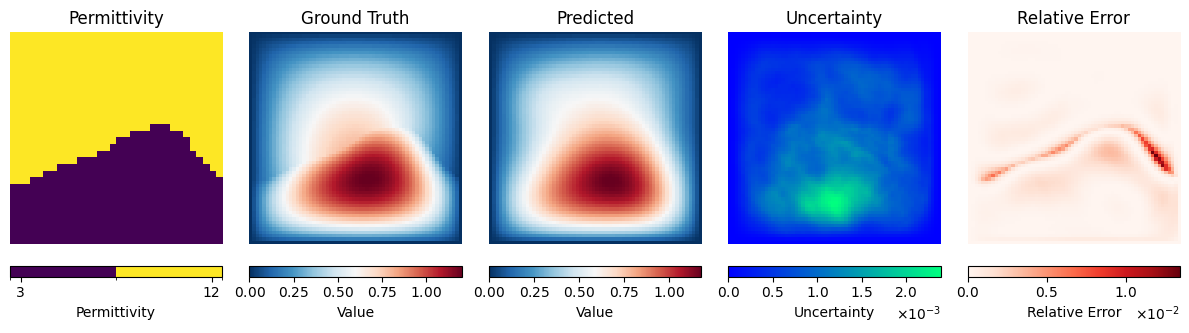

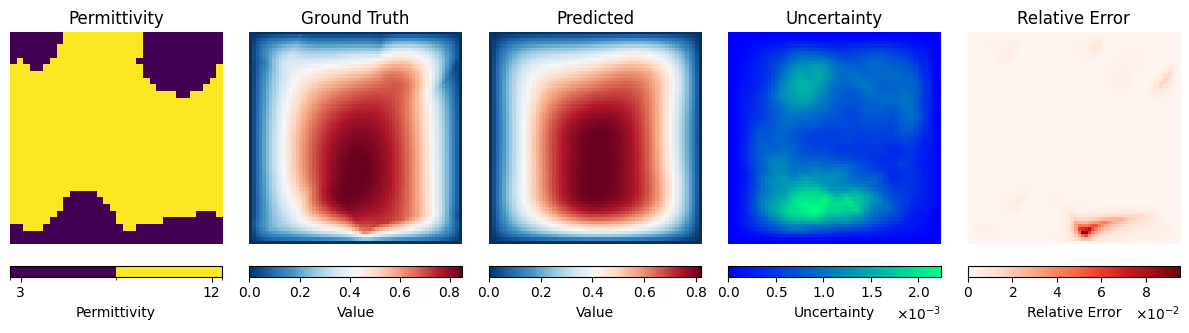

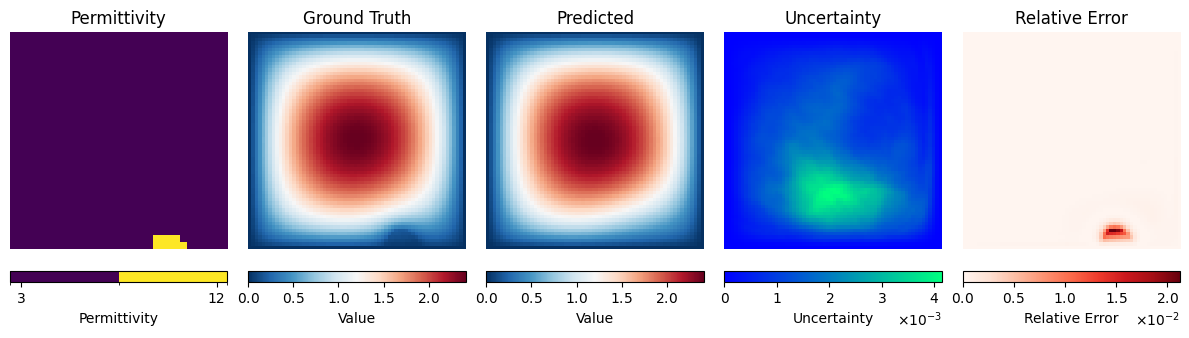

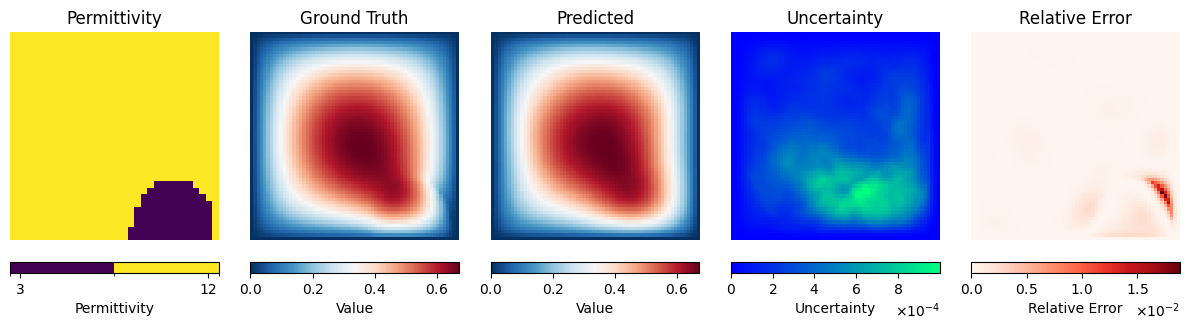

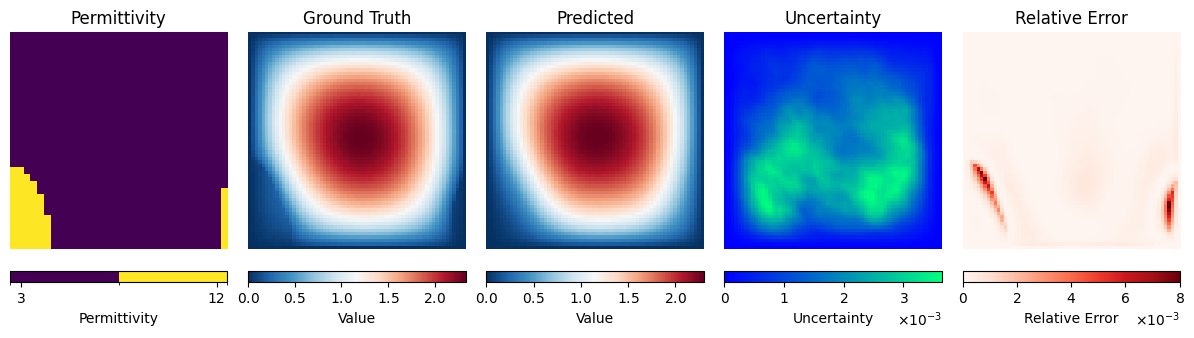

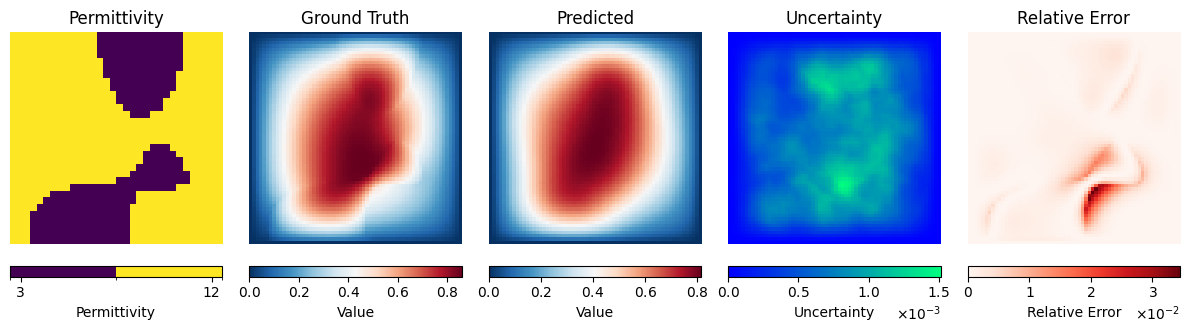

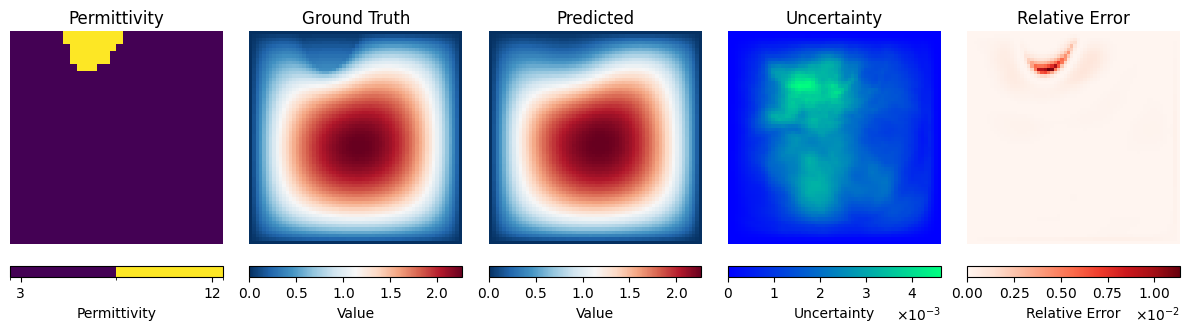

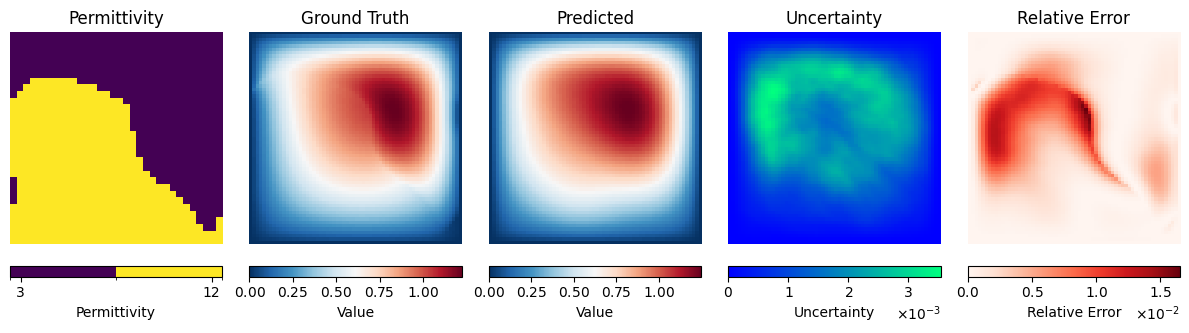

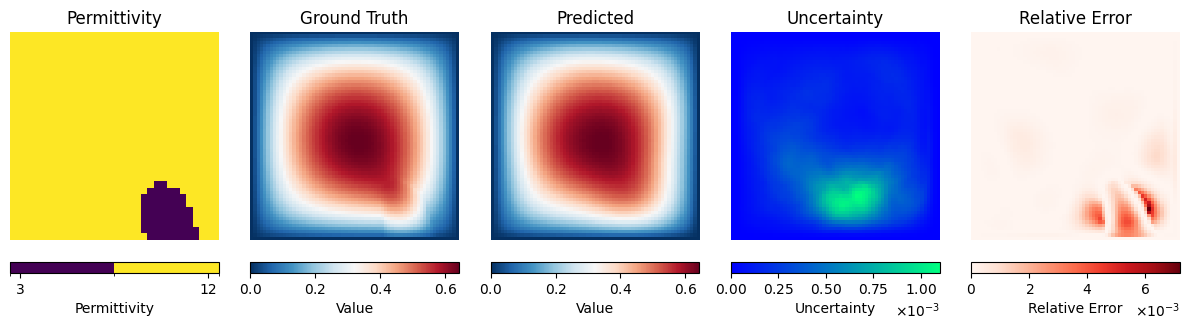

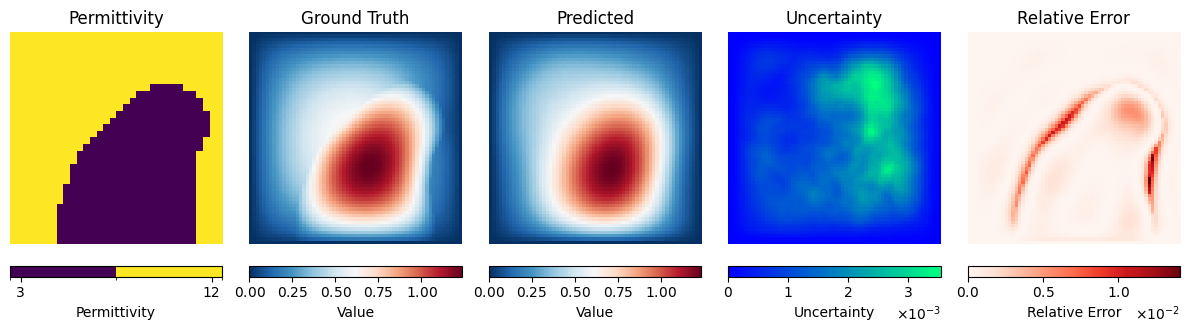

In [ ]:
for i, (a, u, u_pred_DP, std_pred_DP, error_DP) in enumerate(zip(gt['a'], gt['u'], res["u_pred_DP"], res["std_pred_DP"], res["error_DP"])):
    fig, ax = plt.subplots(1, 5, figsize=(12, 5))  # Adjusted figure size for clarity

    u_pred = tf.reshape(u_pred_DP[-1], (64, 64))
    std = tf.reshape(std_pred_DP[-1], (64, 64))
    error = tf.reshape(error_DP[-1], (64, 64))

    # Define a segmented colormap for 'Permittivity' with 2 levels
    levels = [3, 12]
    cmap_segmented = mcolors.ListedColormap(["#440154", "#FDE725"])  # Two distinct colors for 3 and 12
    norm_segmented = mcolors.BoundaryNorm([2.5, 7.5, 12.5], cmap_segmented.N, extend='neither')  # Boundaries between levels

    # Permittivity with segmented colorbar
    im0 = ax[0].imshow(a, cmap=cmap_segmented, norm=norm_segmented)
    ax[0].set_axis_off()
    ax[0].set_title("Permittivity")
    cbar0 = fig.colorbar(im0, ax=ax[0], orientation="horizontal", fraction=0.046, pad=0.05)
    cbar0.set_label("Permittivity", fontsize=10)
    cbar0.set_ticks(levels)
    # cbar0.set_ticklabels([f"Level {lvl}" for lvl in levels])

    # Ground Truth
    im1 = ax[1].imshow(u, cmap="RdBu_r")
    ax[1].set_axis_off()
    ax[1].set_title("Ground Truth")
    cbar1 = fig.colorbar(im1, ax=ax[1], orientation="horizontal", fraction=0.046, pad=0.05)
    cbar1.set_label("Value", fontsize=10)
    cbar1.formatter = ticker.ScalarFormatter(useMathText=True)
    cbar1.formatter.set_powerlimits((-2, 2))
    cbar1.update_ticks()

    # Predicted
    im2 = ax[2].imshow(u_pred, cmap="RdBu_r")
    ax[2].set_axis_off()
    ax[2].set_title("Predicted")
    cbar2 = fig.colorbar(im2, ax=ax[2], orientation="horizontal", fraction=0.046, pad=0.05)
    cbar2.set_label("Value", fontsize=10)
    cbar2.formatter = ticker.ScalarFormatter(useMathText=True)
    cbar2.formatter.set_powerlimits((-2, 2))
    cbar2.update_ticks()

    # Uncertainty
    im3 = ax[3].imshow(std, cmap="winter")
    ax[3].set_axis_off()
    ax[3].set_title("Uncertainty")
    cbar3 = fig.colorbar(im3, ax=ax[3], orientation="horizontal", fraction=0.046, pad=0.05)
    cbar3.set_label("Uncertainty", fontsize=10)
    cbar3.formatter = ticker.ScalarFormatter(useMathText=True)
    cbar3.formatter.set_powerlimits((-2, 2))
    cbar3.update_ticks()

    # Relative Error
    im4 = ax[4].imshow(error, cmap="Reds")
    ax[4].set_axis_off()
    ax[4].set_title("Relative Error")
    cbar4 = fig.colorbar(im4, ax=ax[4], orientation="horizontal", fraction=0.046, pad=0.05)
    cbar4.set_label("Relative Error", fontsize=10)
    cbar4.formatter = ticker.ScalarFormatter(useMathText=True)
    cbar4.formatter.set_powerlimits((-2, 2))
    cbar4.update_ticks()

    plt.tight_layout()
    plt.savefig(SOURCE_PATH + f"/Test/{NOISE_LEVEL}_{N_MODELS}_{i}.pdf", dpi = 300)
    plt.show()

